**NAMA ANGGOTA KELOMPOK :**
1. ANISA KHAYNUN NAJWA (23031554007)

2. THEA BAYU REVALINA (23031554035)

3. DANISA ARIATNA PUTRI (23031554048)

4. BRILLIYANDA ANNISATULROHMAH (23031554216)

# **DATA**

In [88]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df.head()

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

# **EDA**

In [90]:
# Menampilkan statistik deskriptif dengan count, mean, std, min, 25%, 50%, 75%, max, dan unique
descriptive_stats = df.describe(include='all').T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'unique']]

# Menampilkan hasil
print(descriptive_stats)

           count          mean            std        min        25%  \
id        9105.0        4553.0    2628.531434        1.0     2277.0   
age       9105.0     62.650823       15.59371   18.04199     52.797   
death     9105.0      0.681054       0.466094        0.0        0.0   
sex         9105           NaN            NaN        NaN        NaN   
hospdead  9105.0      0.259198       0.438219        0.0        0.0   
slos      9105.0     17.863042       22.00644        3.0        6.0   
d.time    9105.0    478.449863     560.383272        3.0       26.0   
dzgroup     9105           NaN            NaN        NaN        NaN   
dzclass     9105           NaN            NaN        NaN        NaN   
num.co    9105.0      1.868644       1.344409        0.0        1.0   
edu       7471.0     11.747691       3.447743        0.0       10.0   
income      6123           NaN            NaN        NaN        NaN   
scoma     9104.0     12.058546      24.636694        0.0        0.0   
charge

In [91]:
# Menampilkan statistik deskriptif untuk kolom bertipe objek (kategori/string)
object_stats = df.describe(include=[object]).T[['count', 'unique', 'top', 'freq']]

# Menampilkan hasil
print(object_stats)

        count unique                top  freq
sex      9105      2               male  5125
dzgroup  9105      8  ARF/MOSF w/Sepsis  3515
dzclass  9105      4           ARF/MOSF  4227
income   6123      4         under $11k  2855
race     9063      5              white  7191
ca       9105      3                 no  5995
dnr      9075      3             no dnr  5880
sfdm2    7705      5   <2 mo. follow-up  3123


In [92]:
df = df.drop(['id','hospdead','sfdm2'], axis=1) #di drop dikarenakan merupakan variabel target

In [93]:
df = df.drop(['slos','d.time'], axis=1) #karena tidak termasuk fitur

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   dzgroup   9105 non-null   object 
 4   dzclass   9105 non-null   object 
 5   num.co    9105 non-null   int64  
 6   edu       7471 non-null   float64
 7   income    6123 non-null   object 
 8   scoma     9104 non-null   float64
 9   charges   8933 non-null   float64
 10  totcst    8217 non-null   float64
 11  totmcst   5630 non-null   float64
 12  avtisst   9023 non-null   float64
 13  race      9063 non-null   object 
 14  sps       9104 non-null   float64
 15  aps       9104 non-null   float64
 16  surv2m    9104 non-null   float64
 17  surv6m    9104 non-null   float64
 18  hday      9105 non-null   int64  
 19  diabetes  9105 non-null   int64  
 20  dementia  9105 non-null   int6

In [95]:
# hitung rata-rata missing value

missing_percentage = df.isnull().sum() * 100 / len(df)
print(missing_percentage)
average_missing_percentage = missing_percentage.mean()
print(f"\nAverage percentage of missing values: {average_missing_percentage:.2f}%")


age          0.000000
death        0.000000
sex          0.000000
dzgroup      0.000000
dzclass      0.000000
num.co       0.000000
edu         17.946183
income      32.751236
scoma        0.010983
charges      1.889072
totcst       9.752883
totmcst     38.165843
avtisst      0.900604
race         0.461285
sps          0.010983
aps          0.010983
surv2m       0.010983
surv6m       0.010983
hday         0.000000
diabetes     0.000000
dementia     0.000000
ca           0.000000
prg2m       18.110928
prg6m       17.935200
dnr          0.329489
dnrday       0.329489
meanbp       0.010983
wblc         2.328391
hrt          0.010983
resp         0.010983
temp         0.010983
pafi        25.535420
alb         37.034596
bili        28.566722
crea         0.735859
sod          0.010983
ph          25.085118
glucose     49.423394
bun         47.797913
urine       53.399231
adlp        61.954970
adls        31.488193
adlsc        0.000000
dtype: float64

Average percentage of missing values: 

In [96]:
# Drop columns dengan missing value lebih dari 30%
threshold = 0.30
df = df.dropna(thresh=len(df) * (1-threshold), axis=1)
df.info()

missing_percentage = df.isnull().sum() * 100 / len(df)
print(missing_percentage)
average_missing_percentage = missing_percentage.mean()
print(f"\nAverage percentage of missing values: {average_missing_percentage:.2f}%")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   dzgroup   9105 non-null   object 
 4   dzclass   9105 non-null   object 
 5   num.co    9105 non-null   int64  
 6   edu       7471 non-null   float64
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  avtisst   9023 non-null   float64
 11  race      9063 non-null   object 
 12  sps       9104 non-null   float64
 13  aps       9104 non-null   float64
 14  surv2m    9104 non-null   float64
 15  surv6m    9104 non-null   float64
 16  hday      9105 non-null   int64  
 17  diabetes  9105 non-null   int64  
 18  dementia  9105 non-null   int64  
 19  ca        9105 non-null   object 
 20  prg2m     7456 non-null   floa

In [97]:
# Check  duplikat
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Hapus duplikat
df = df.drop_duplicates()

duplicates = df.duplicated()
print(f"Number of duplicate rows after removing: {duplicates.sum()}")



Number of duplicate rows: 0
Number of duplicate rows after removing: 0


# Handling Missing Value

In [98]:
# Mengubah data categorical ke numerical

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col].astype(str))


In [99]:
# Mengisi missing values dengan KNN Imputation

import pandas as pd
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Periksa kembali missing values
missing_percentage_after_imputation = df_imputed.isnull().sum() * 100 / len(df_imputed)
print(missing_percentage_after_imputation)
average_missing_percentage_after_imputation = missing_percentage_after_imputation.mean()
print(f"\nAverage percentage of missing values after imputation: {average_missing_percentage_after_imputation:.2f}%")

df = df_imputed


age         0.0
death       0.0
sex         0.0
dzgroup     0.0
dzclass     0.0
num.co      0.0
edu         0.0
scoma       0.0
charges     0.0
totcst      0.0
avtisst     0.0
race        0.0
sps         0.0
aps         0.0
surv2m      0.0
surv6m      0.0
hday        0.0
diabetes    0.0
dementia    0.0
ca          0.0
prg2m       0.0
prg6m       0.0
dnr         0.0
dnrday      0.0
meanbp      0.0
wblc        0.0
hrt         0.0
resp        0.0
temp        0.0
pafi        0.0
bili        0.0
crea        0.0
sod         0.0
ph          0.0
adlsc       0.0
dtype: float64

Average percentage of missing values after imputation: 0.00%


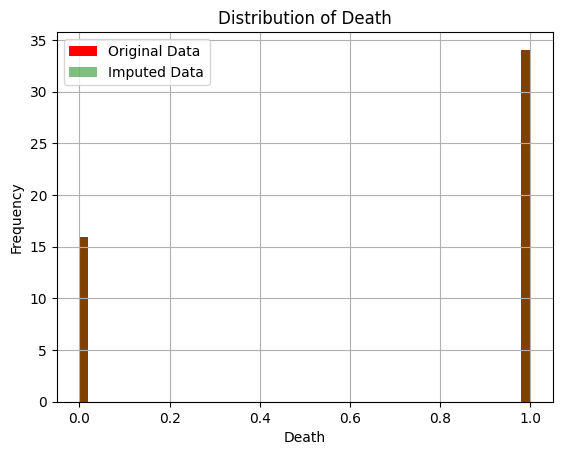

<ipython-input-100-bec3ae6696b0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='death', data=df, palette='Set1')


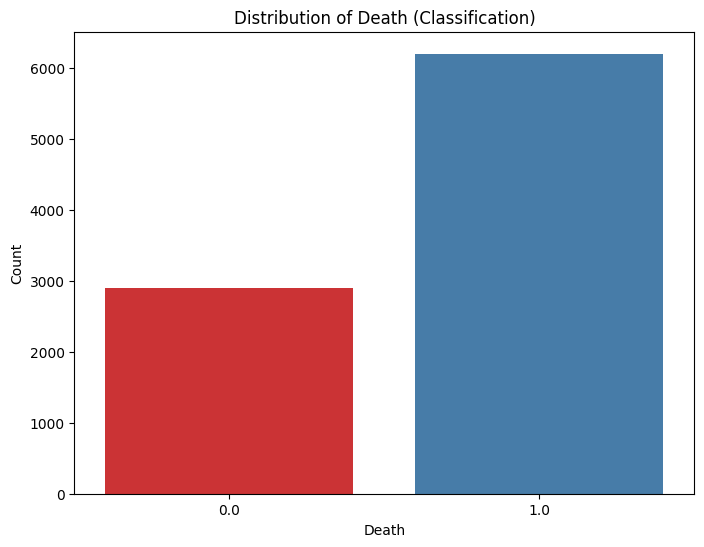

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(111)

# Visualisasi distribusi kolom 'death'
df['death'].hist(bins=50, ax=ax, density=True, color='red', label='Original Data')
df_imputed['death'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5, label='Imputed Data')

plt.title('Distribution of Death')
plt.xlabel('Death')
plt.ylabel('Frequency')
plt.legend()
plt.show()

import seaborn as sns

# Visualisasi distribusi kolom 'death' (klasifikasi)
plt.figure(figsize=(8, 6))
sns.countplot(x='death', data=df, palette='Set1')
plt.title('Distribution of Death (Classification)')
plt.xlabel('Death')
plt.ylabel('Count')
plt.show()

# Handling Outliers

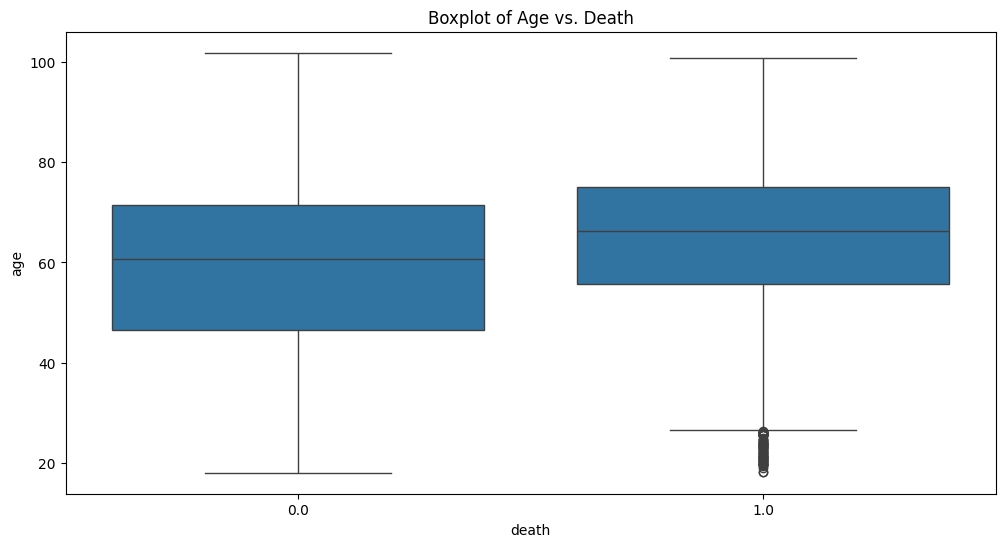

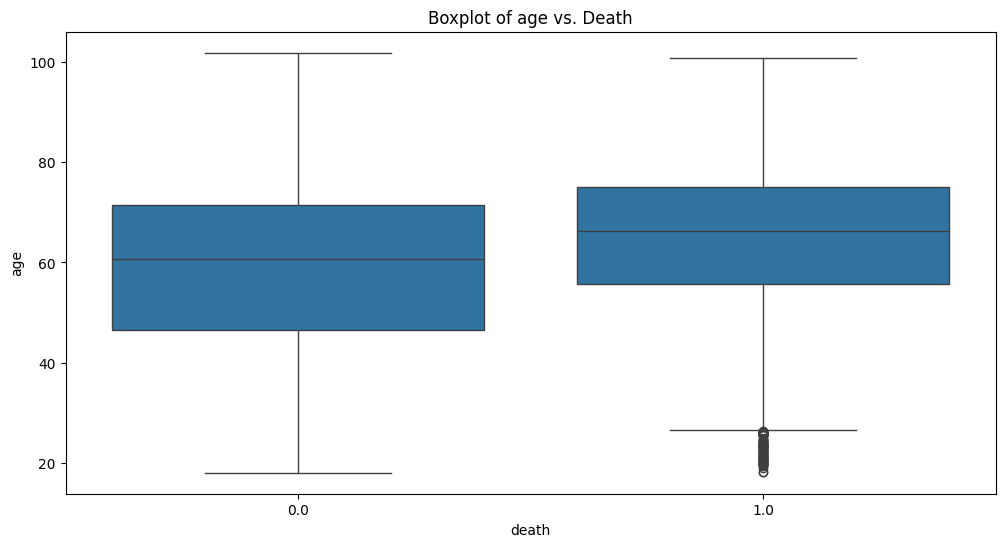

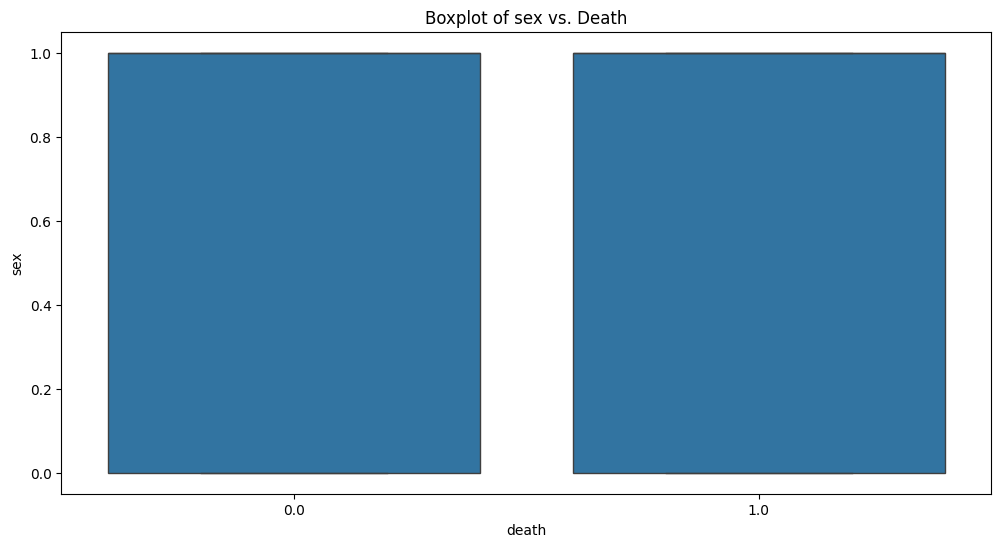

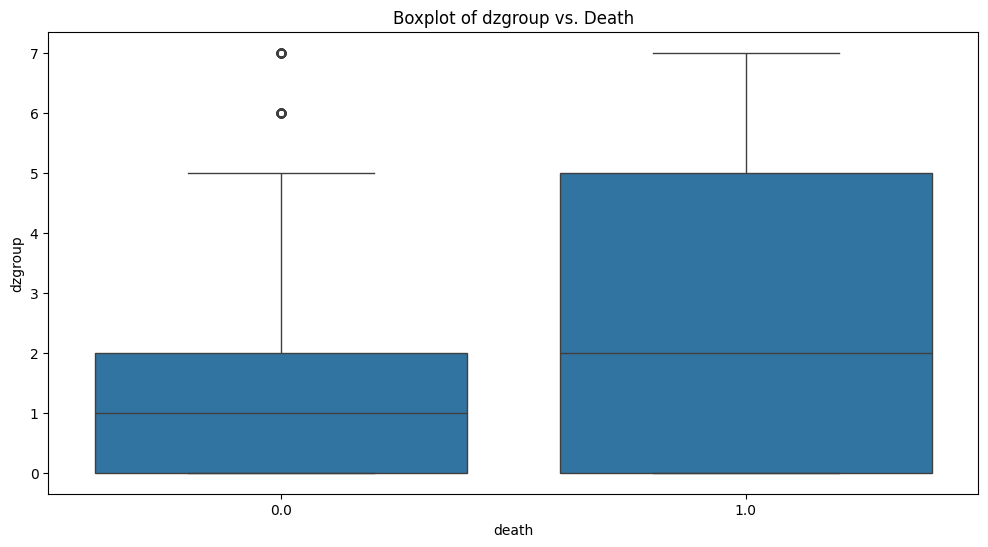

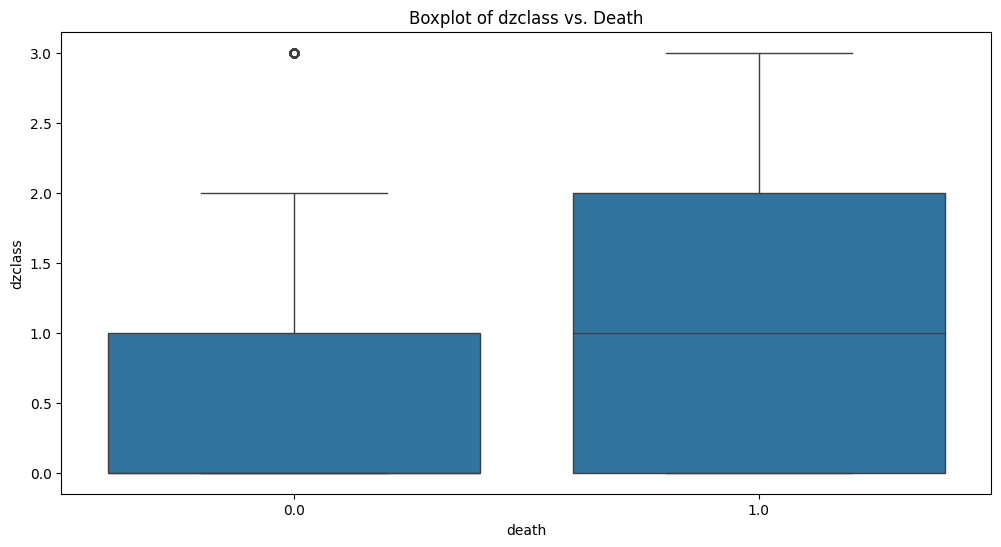

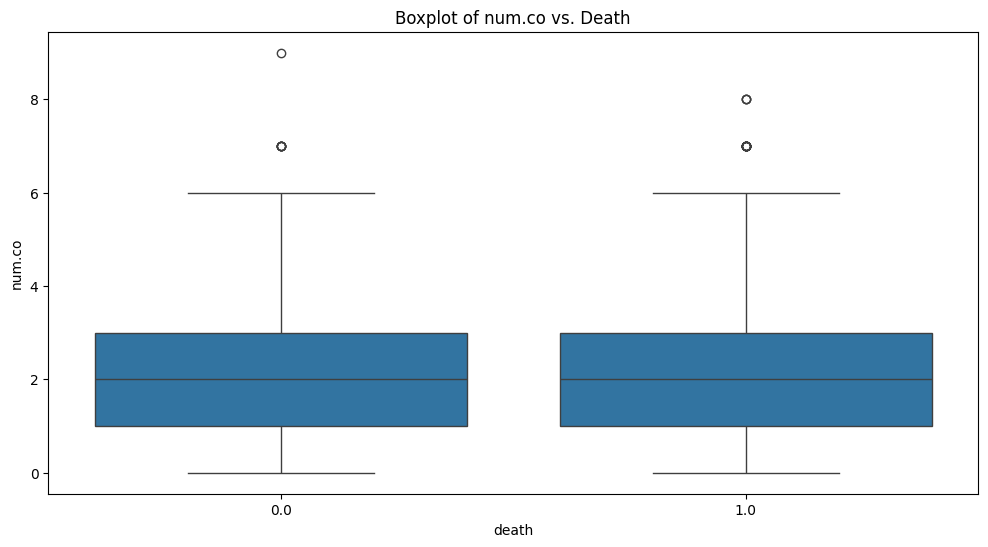

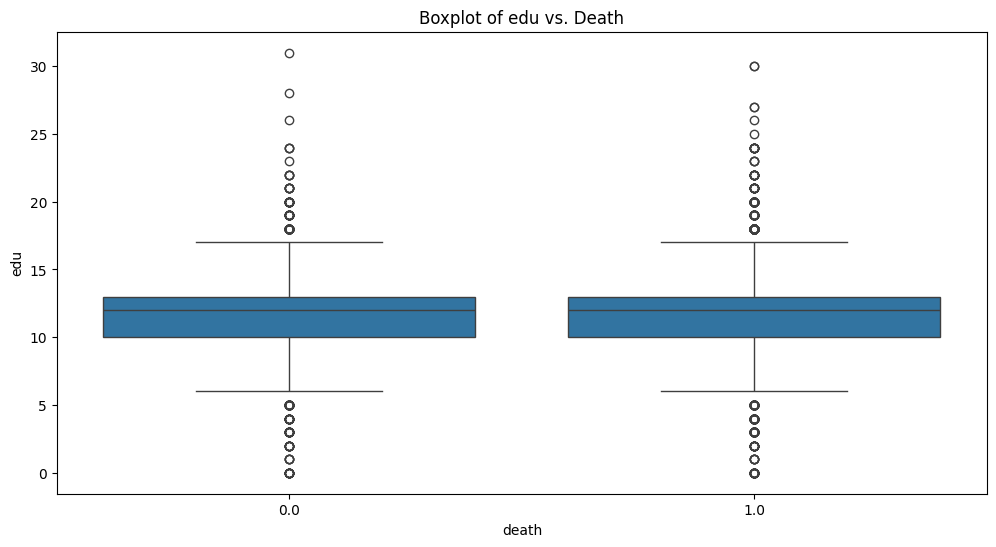

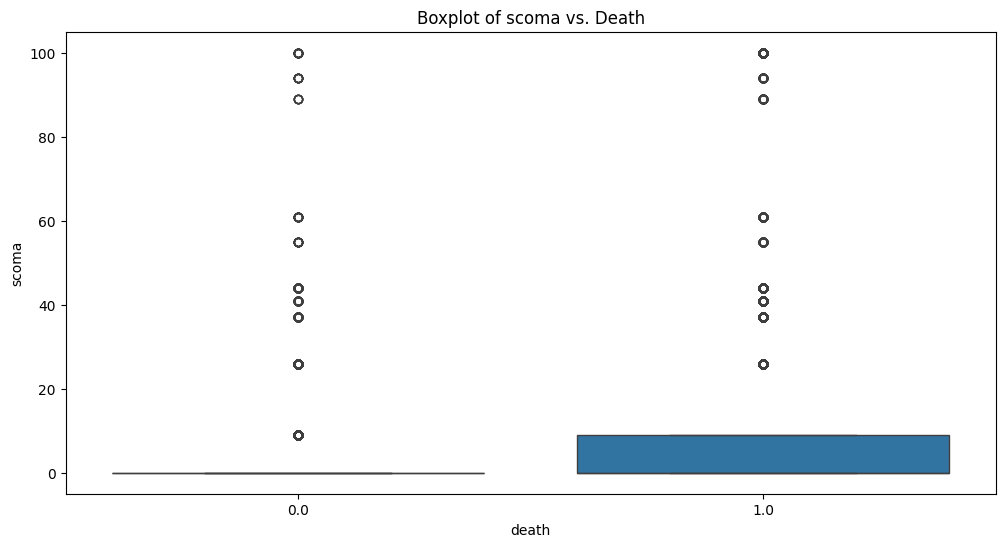

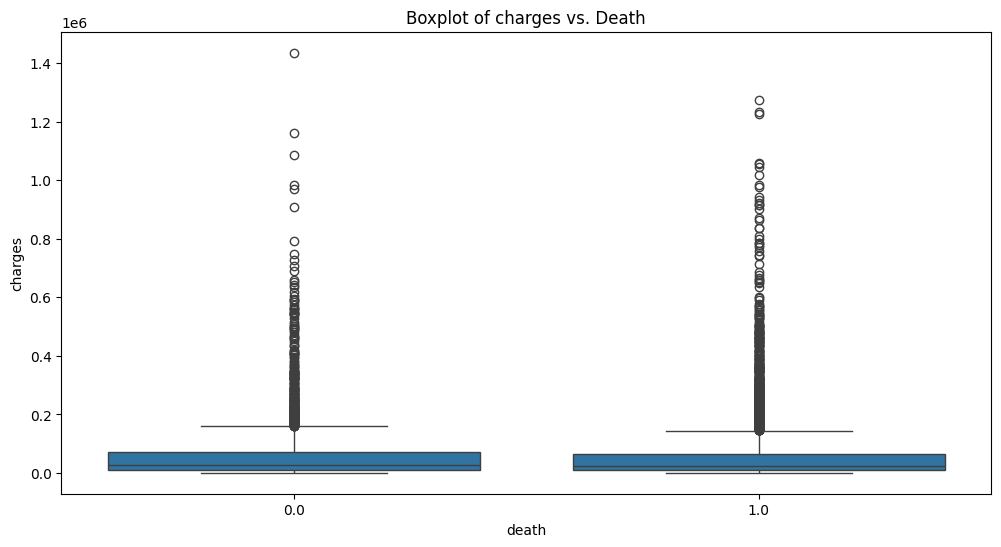

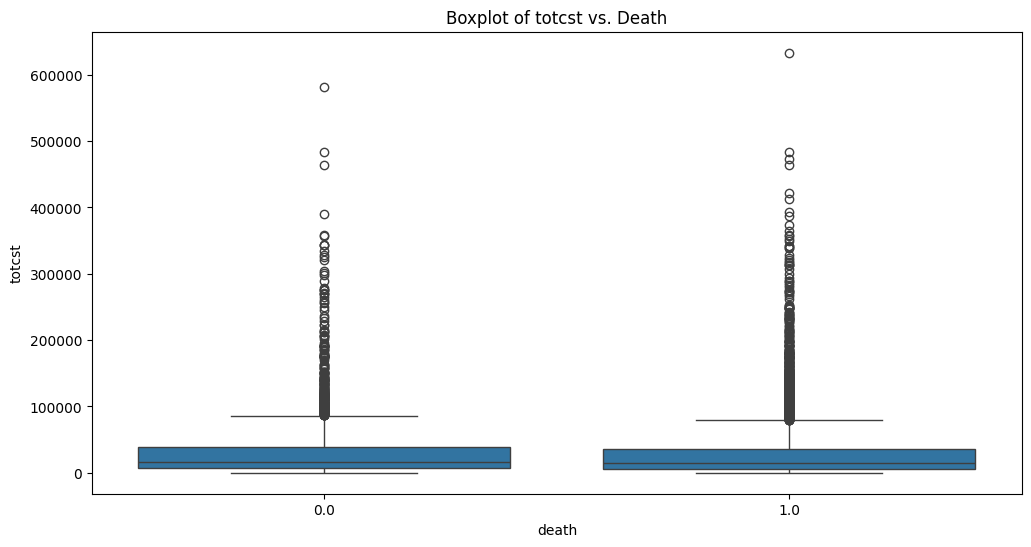

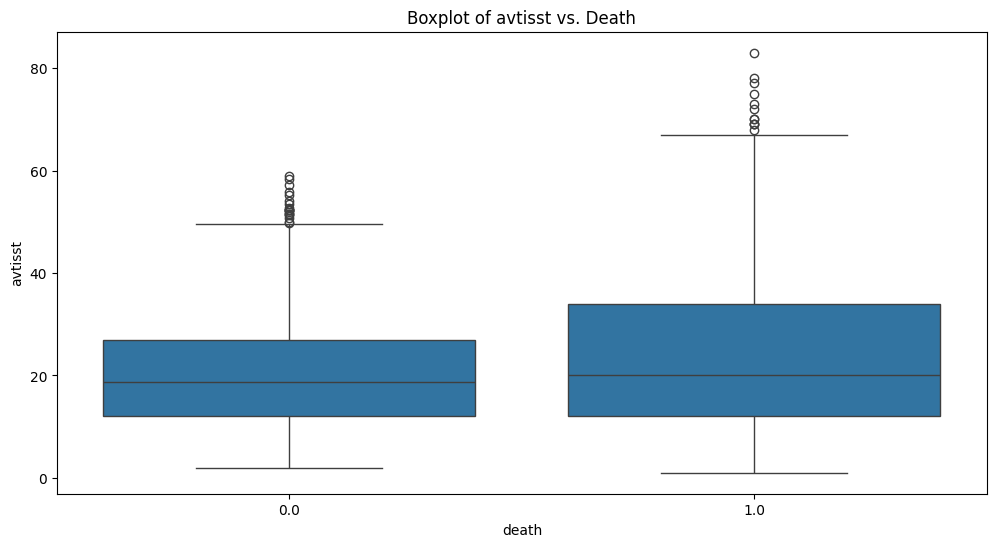

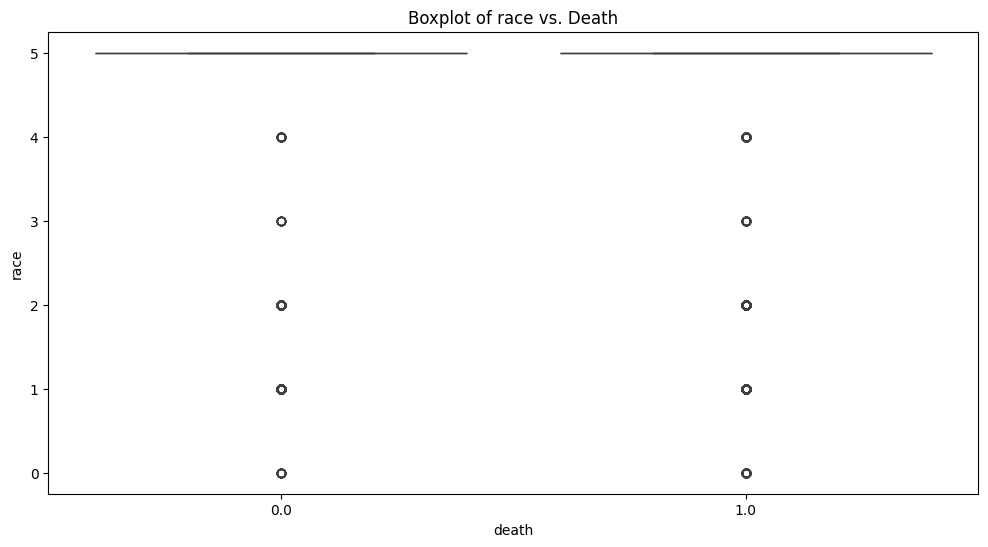

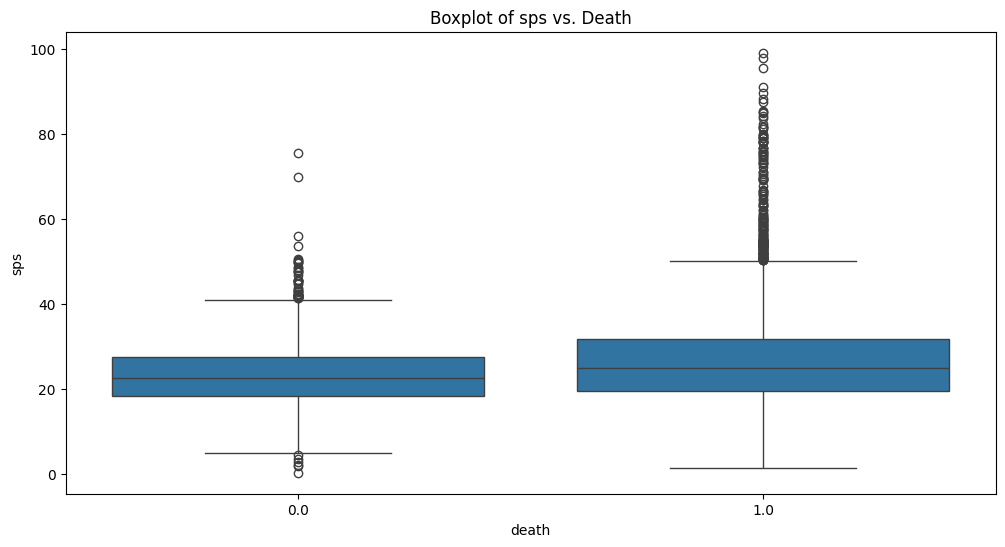

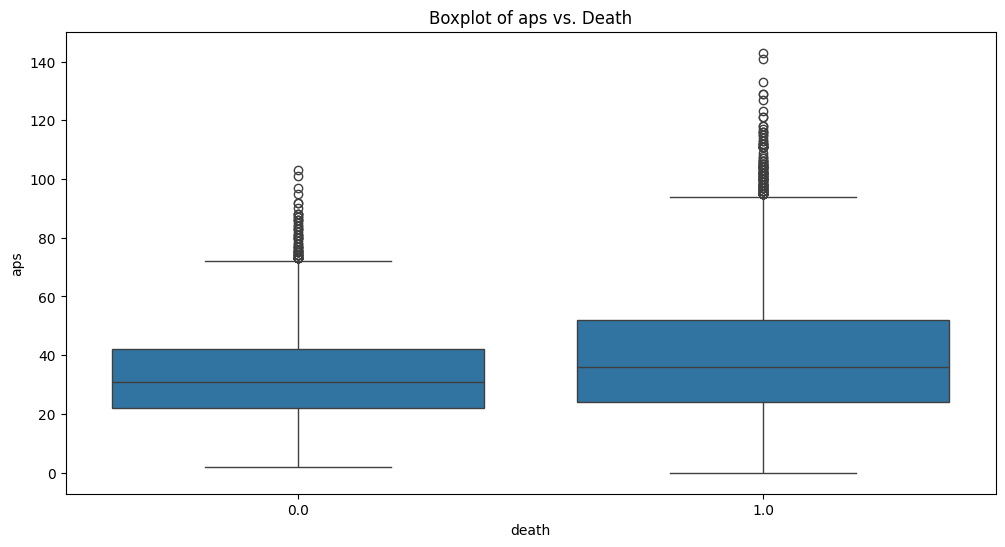

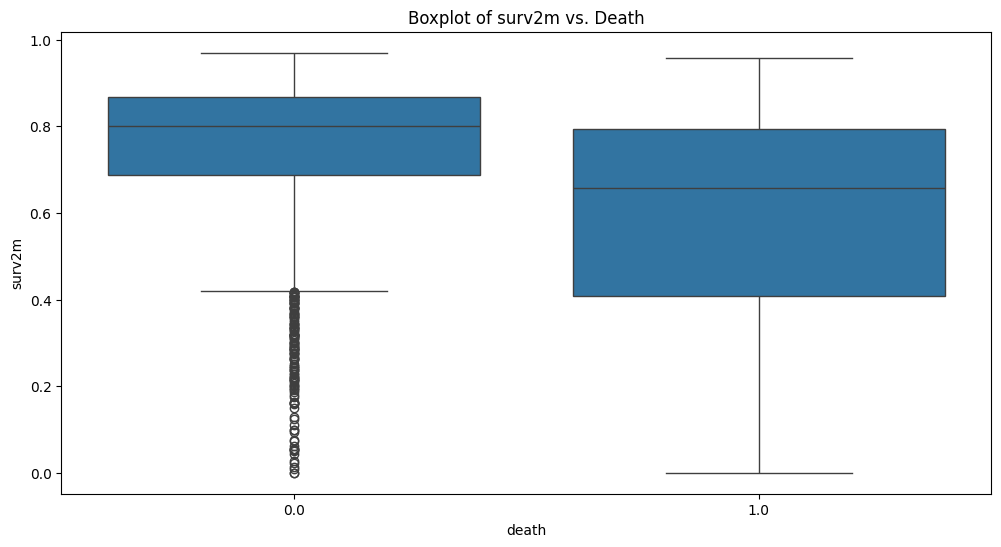

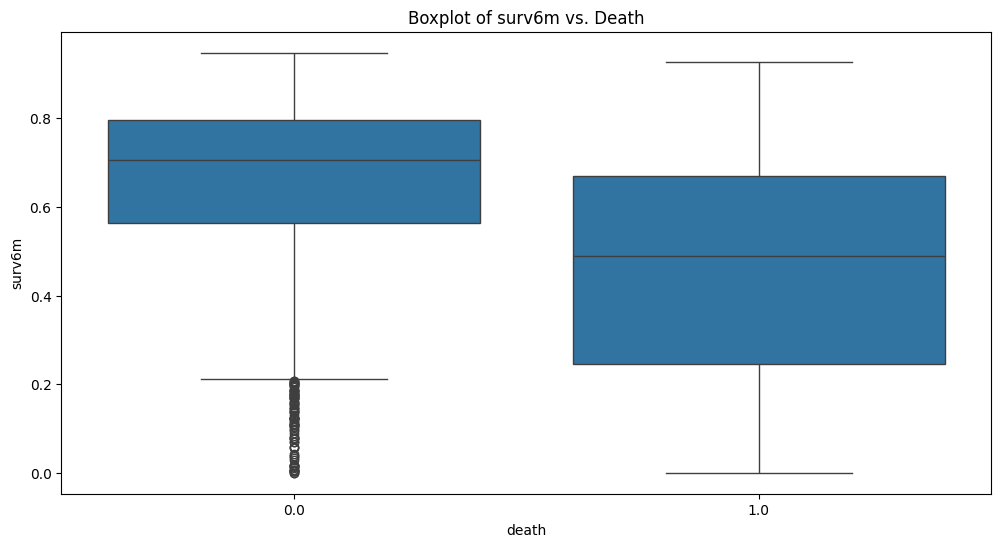

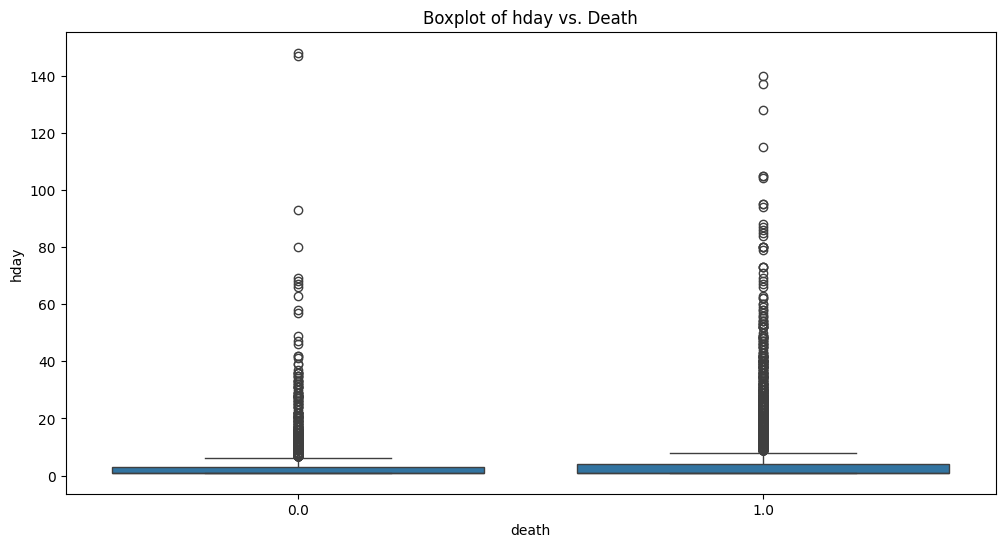

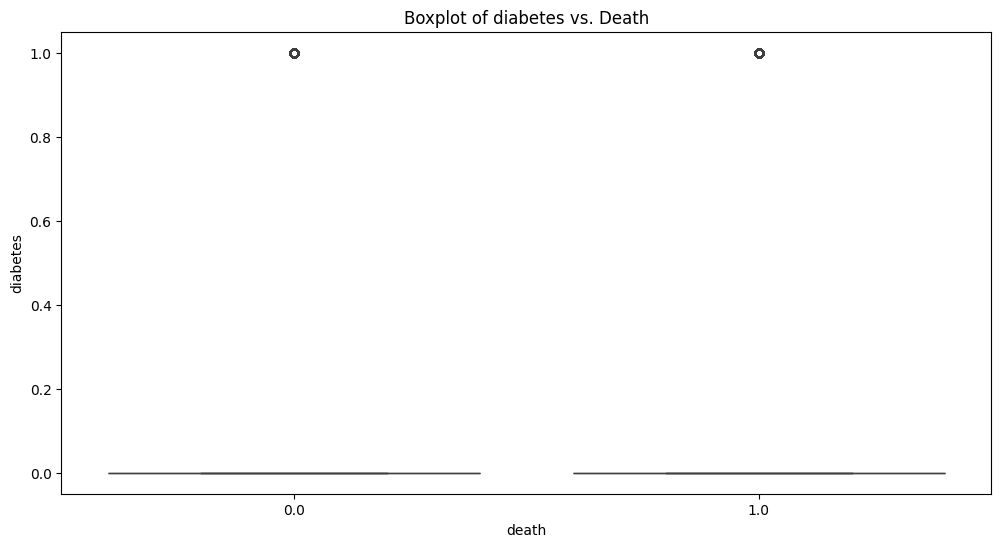

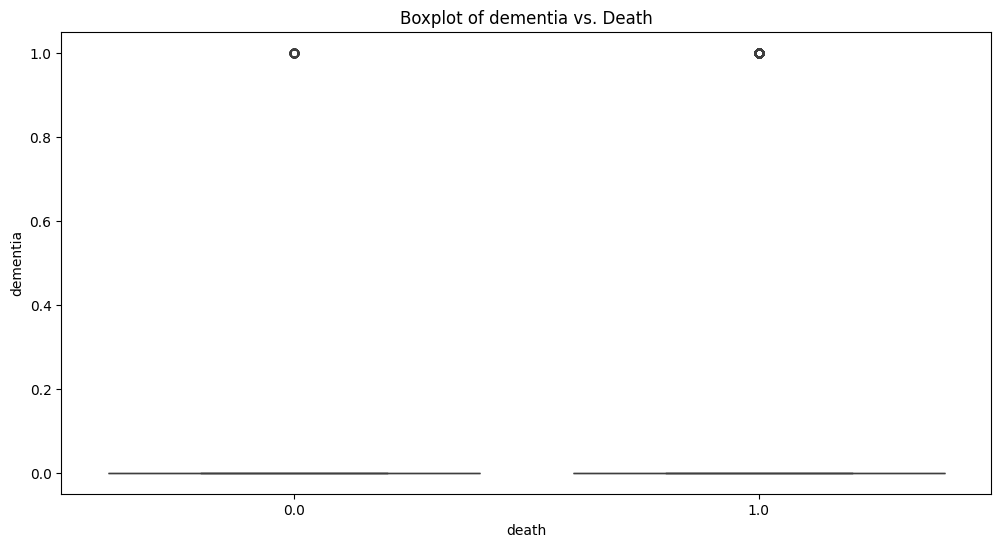

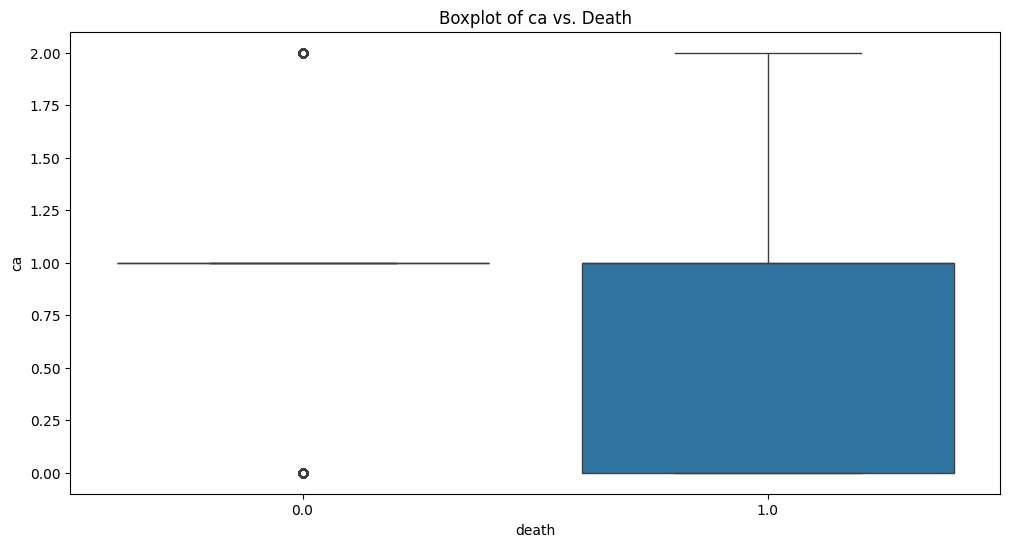

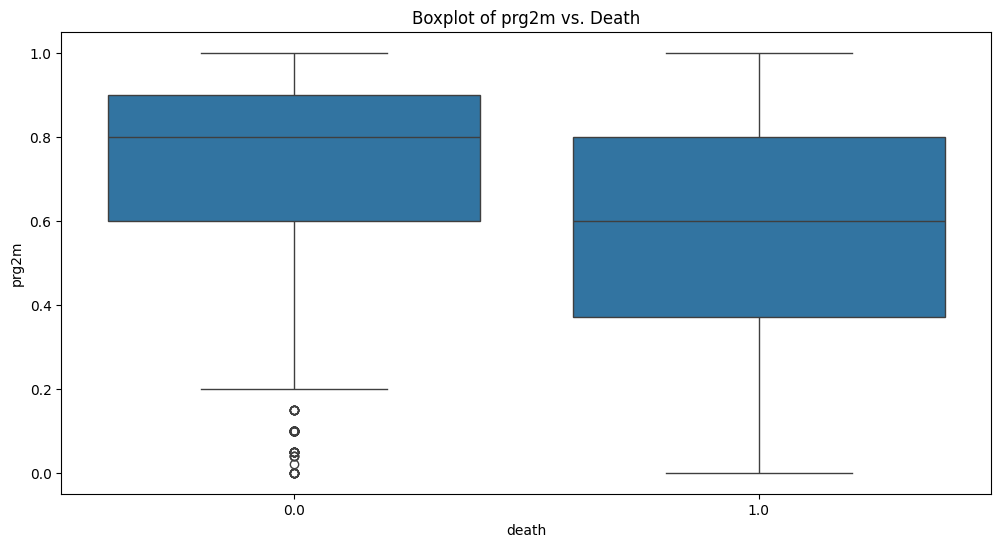

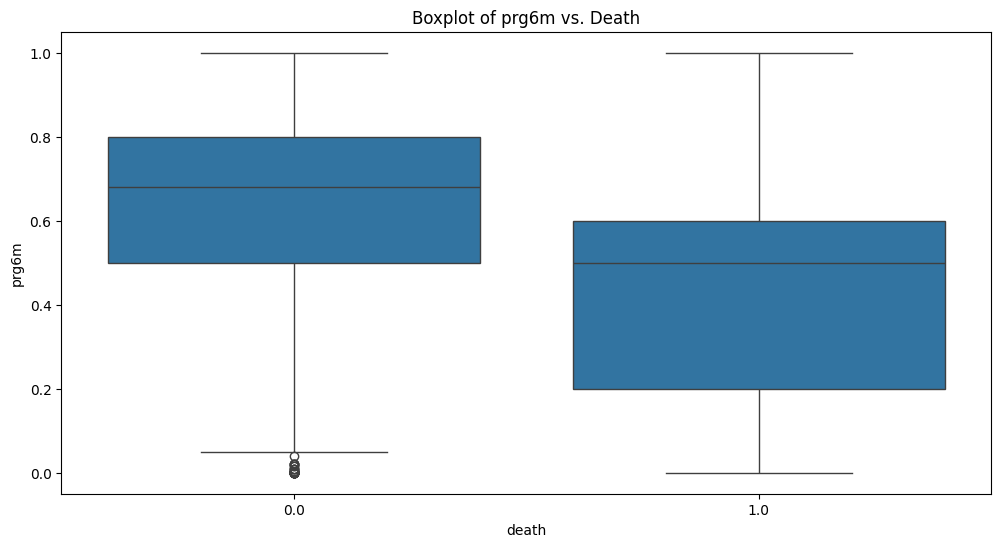

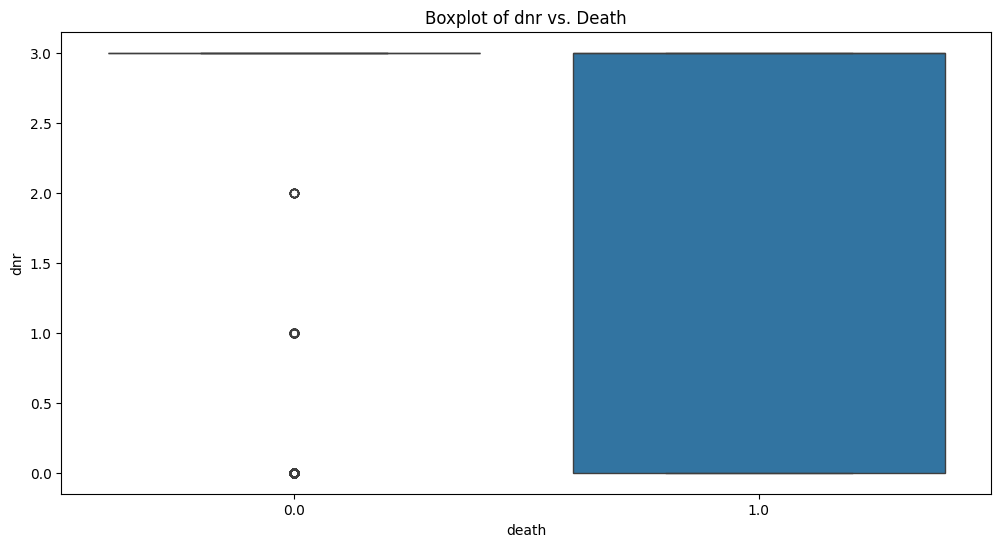

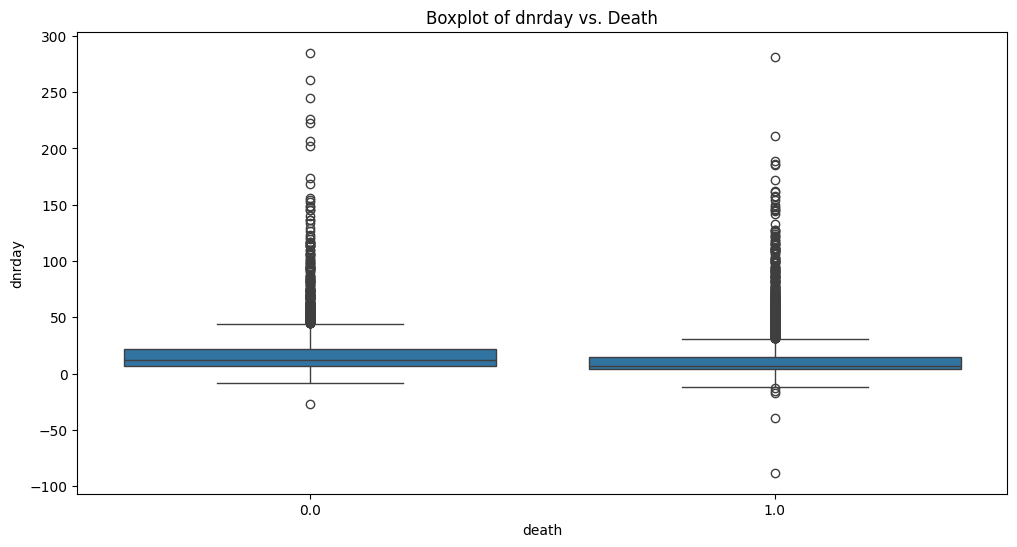

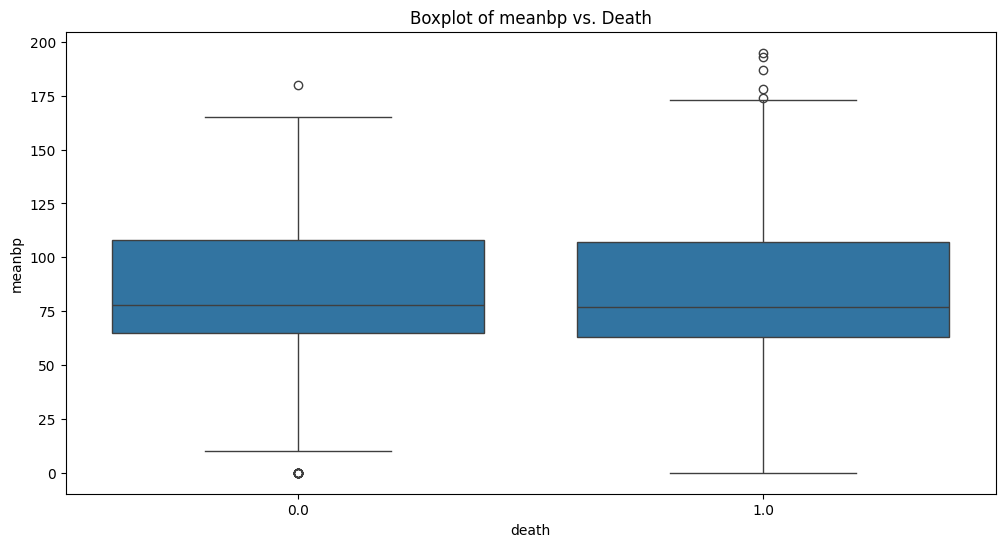

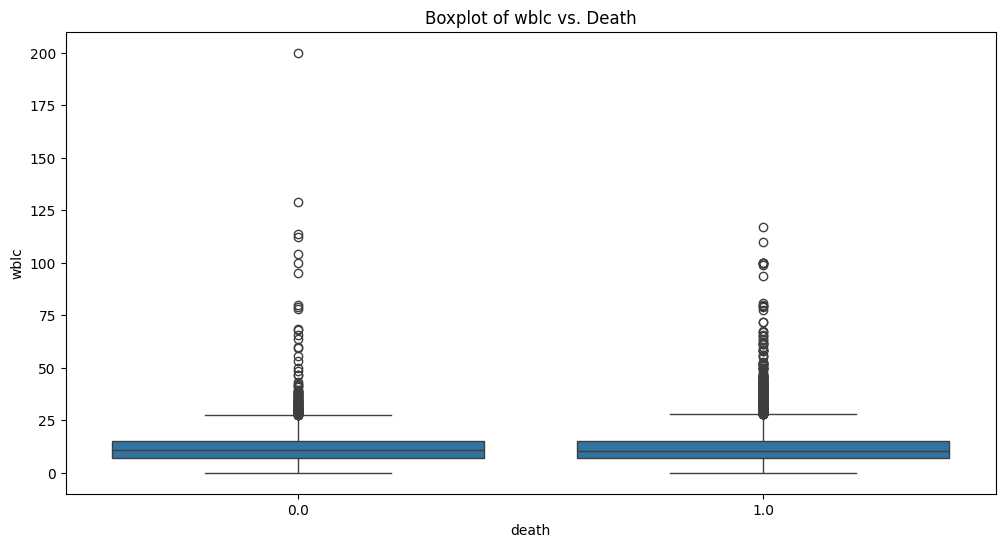

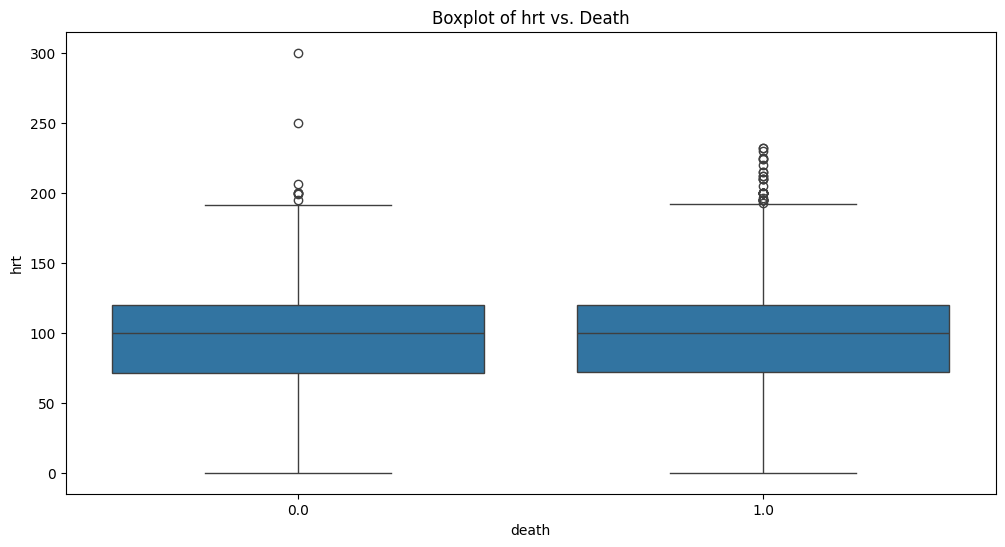

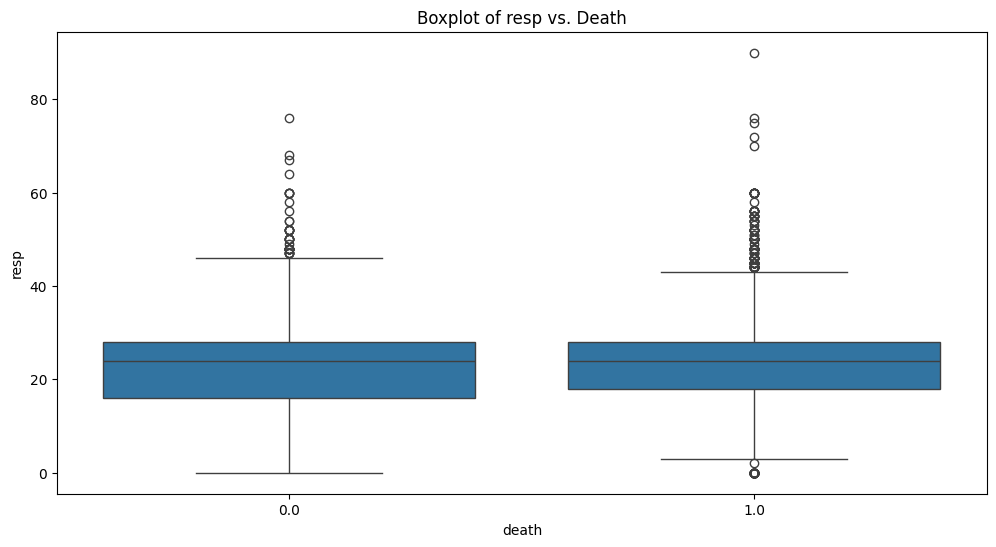

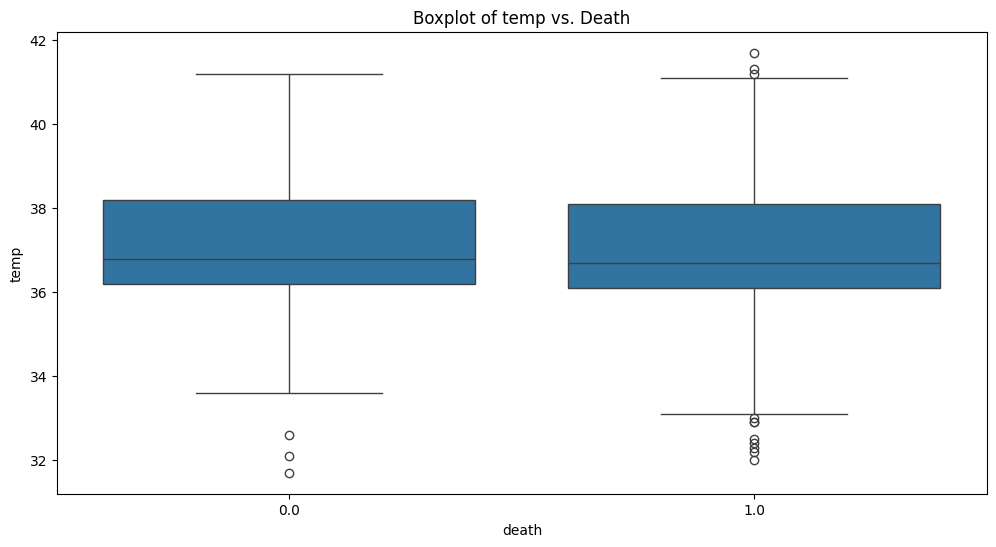

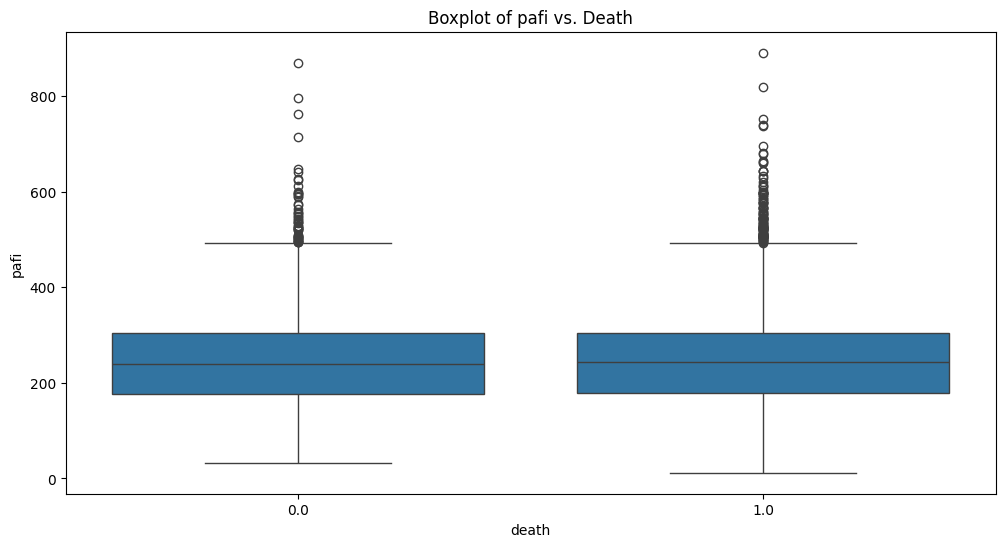

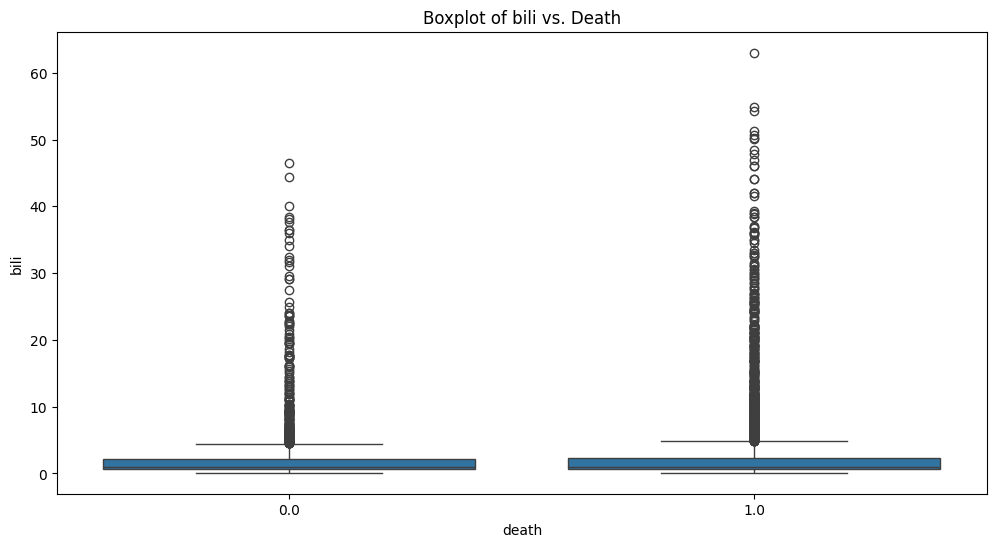

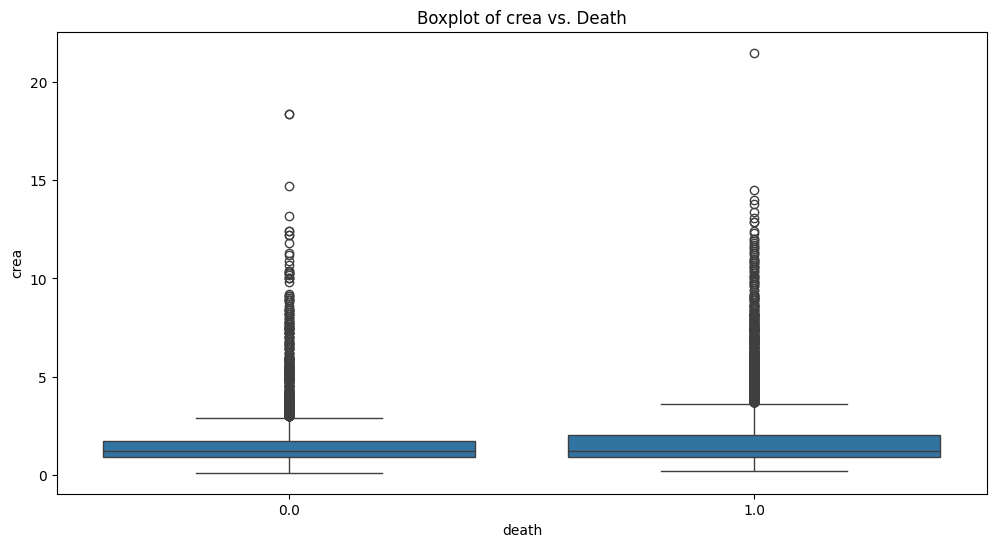

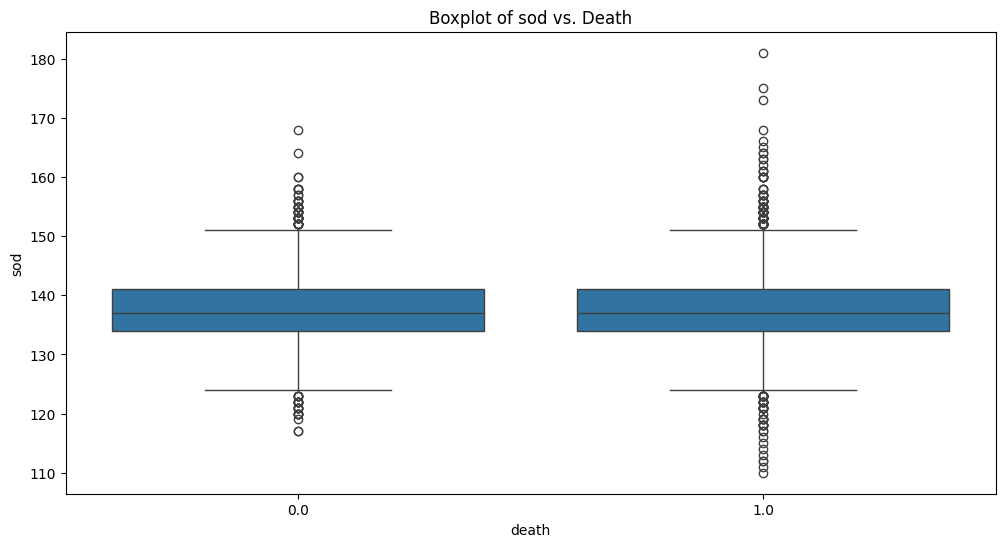

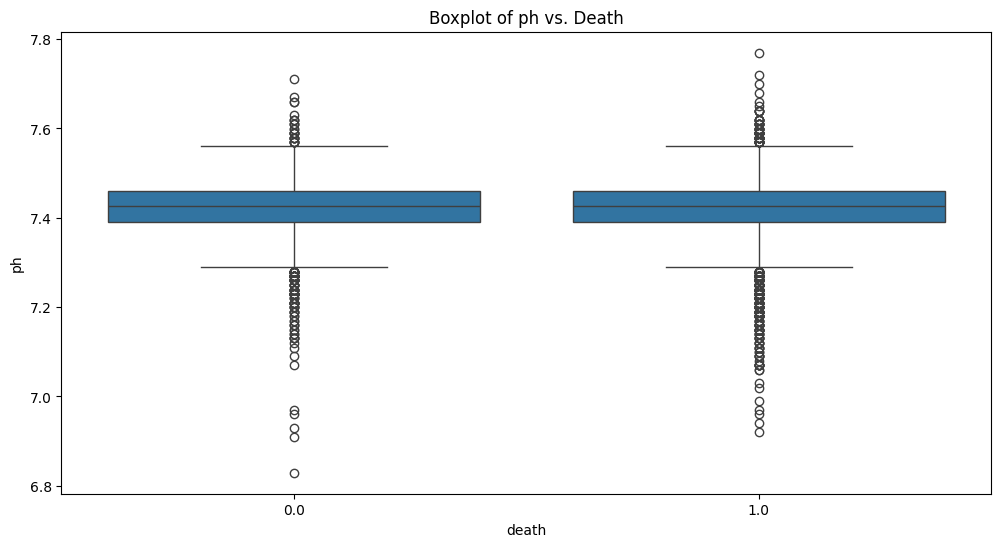

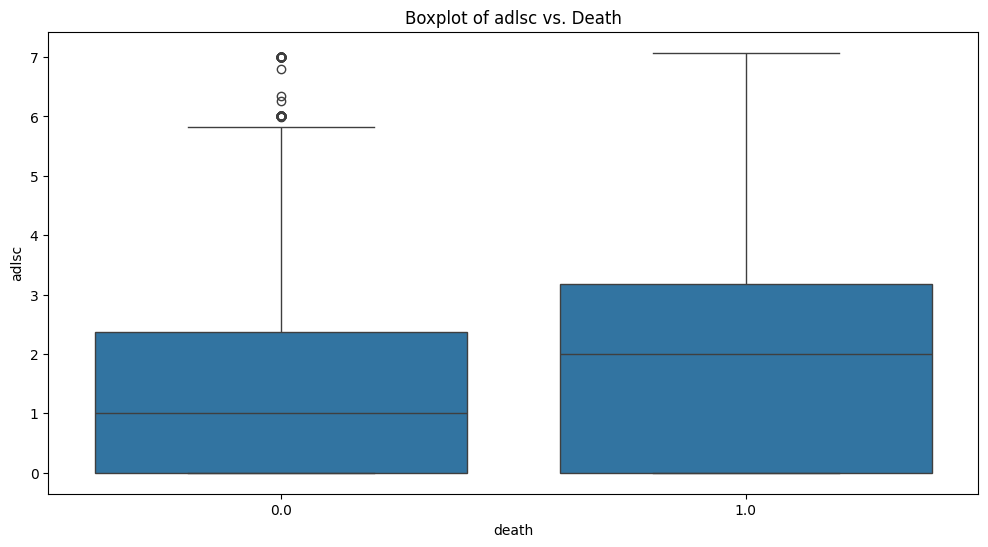

In [101]:
# Visualizing outliers using boxplots terhadap target death

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'death' is your target variable

plt.figure(figsize=(12, 6))
sns.boxplot(x='death', y='age', data=df) # Example with 'age'
plt.title('Boxplot of Age vs. Death')
plt.show()

# Repeat for other numerical features
numerical_features = df.select_dtypes(include=['number']).columns
for feature in numerical_features:
  if feature != 'death': # exclude the target variable
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='death', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs. Death')
    plt.show()


In [102]:
# handling outliers dengan min max normalization

from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik untuk normalisasi (kecuali kolom target 'death')
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('death')


# Lakukan normalisasi min-max
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan DataFrame setelah normalisasi
print(df.head())


        age  death  sex   dzgroup   dzclass    num.co       edu  scoma  \
0  0.534663    0.0  1.0  0.857143  0.666667  0.000000  0.354839   0.00   
1  0.504702    1.0  0.0  0.428571  0.333333  0.222222  0.387097   0.44   
2  0.414111    1.0  0.0  0.428571  0.333333  0.222222  0.387097   0.00   
3  0.290468    1.0  0.0  0.857143  0.666667  0.222222  0.354839   0.00   
4  0.737930    0.0  0.0  0.000000  0.000000  0.111111  0.367742   0.26   

    charges    totcst  ...      wblc       hrt      resp      temp      pafi  \
0  0.005958  0.024379  ...  0.030000  0.230000  0.244444  0.430246  0.428063   
1  0.023236  0.251648  ...  0.085488  0.373333  0.377778  0.289566  0.097908   
2  0.027837  0.029174  ...  0.042500  0.293333  0.311111  0.570145  0.250071   
3  0.001329  0.005032  ...  0.045498  0.293333  0.355556  0.330207  0.348897   
4  0.034135  0.035321  ...  0.067500  0.373333  0.222222  0.620164  0.183649   

       bili      crea       sod        ph     adlsc  
0  0.001590  0.05140

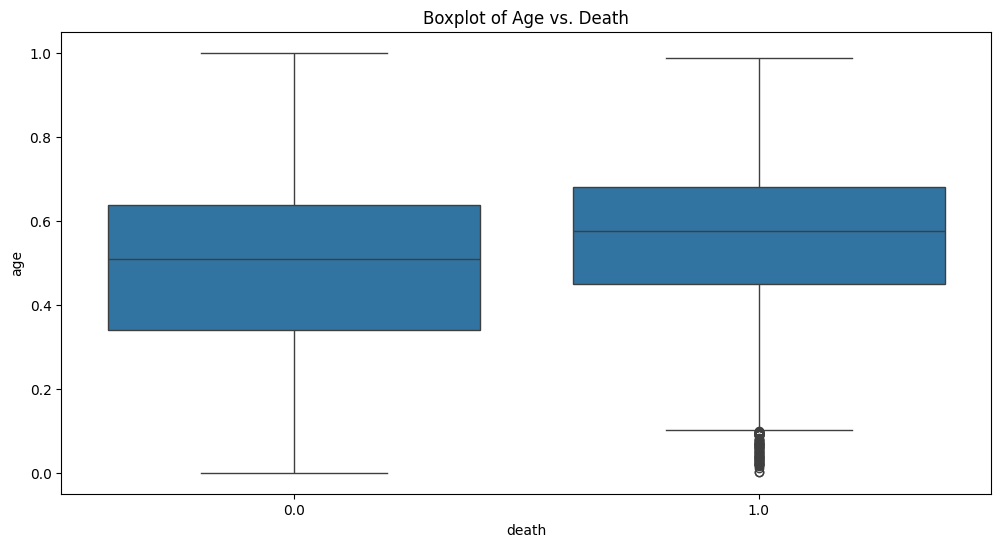

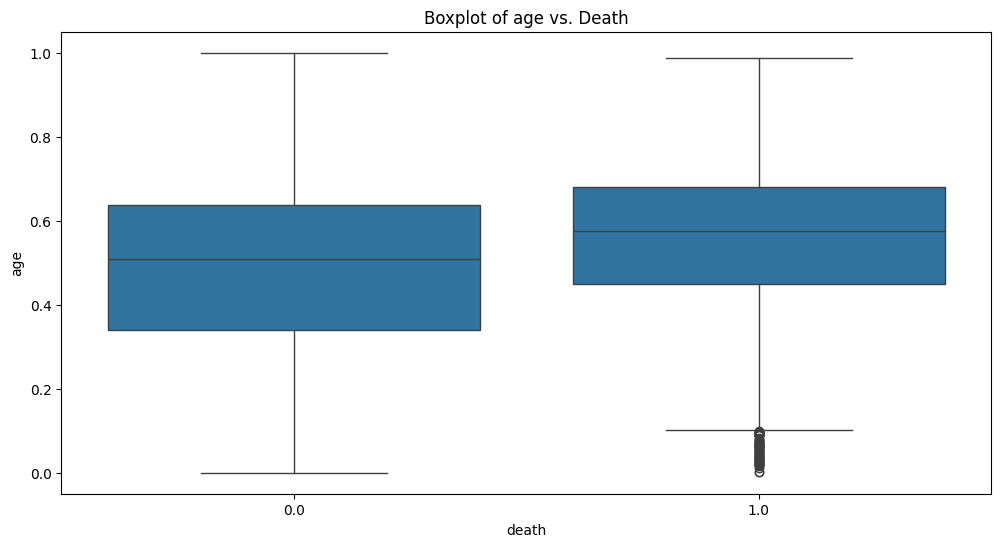

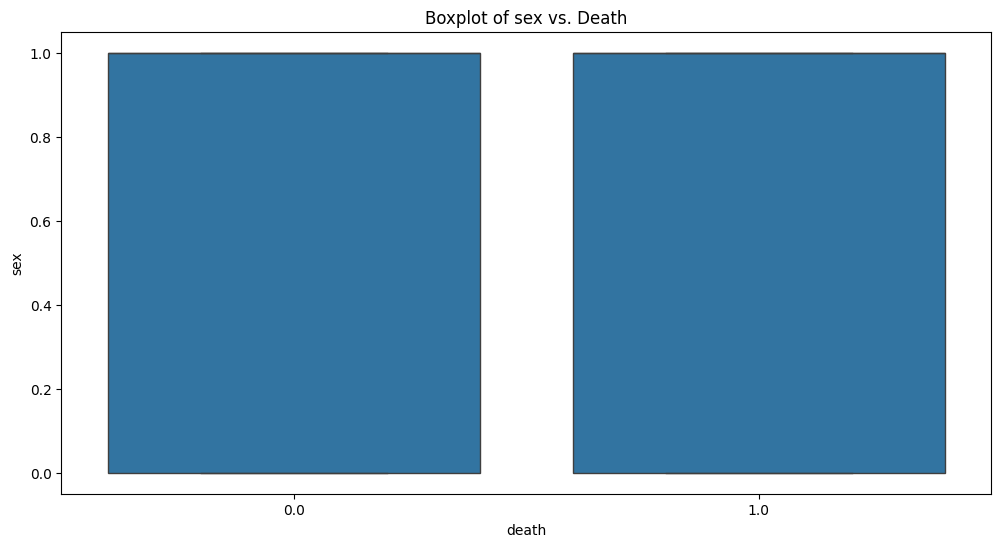

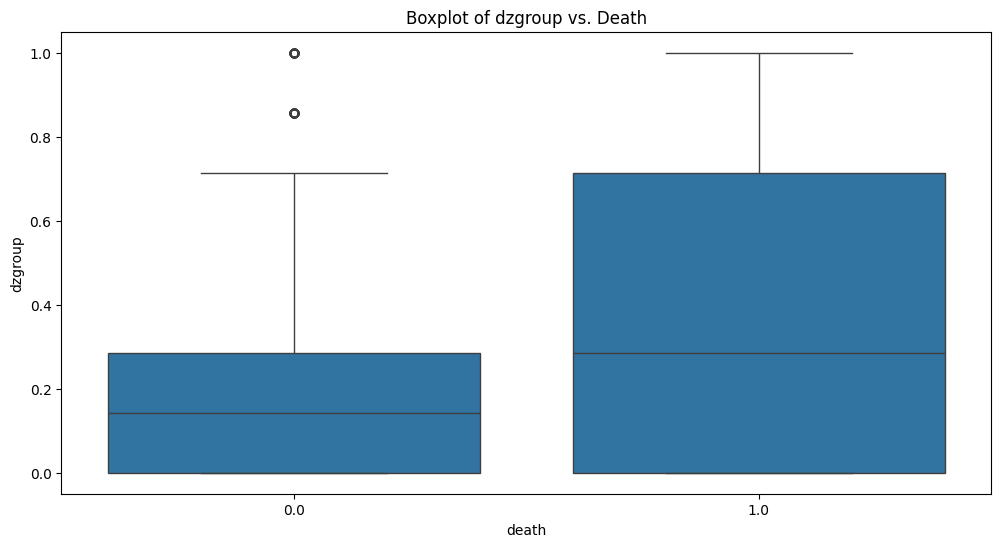

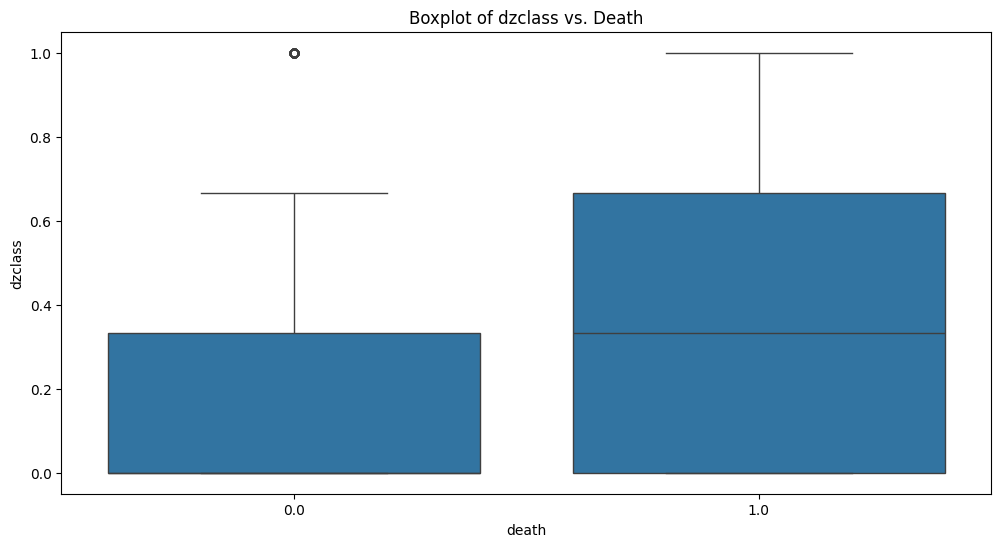

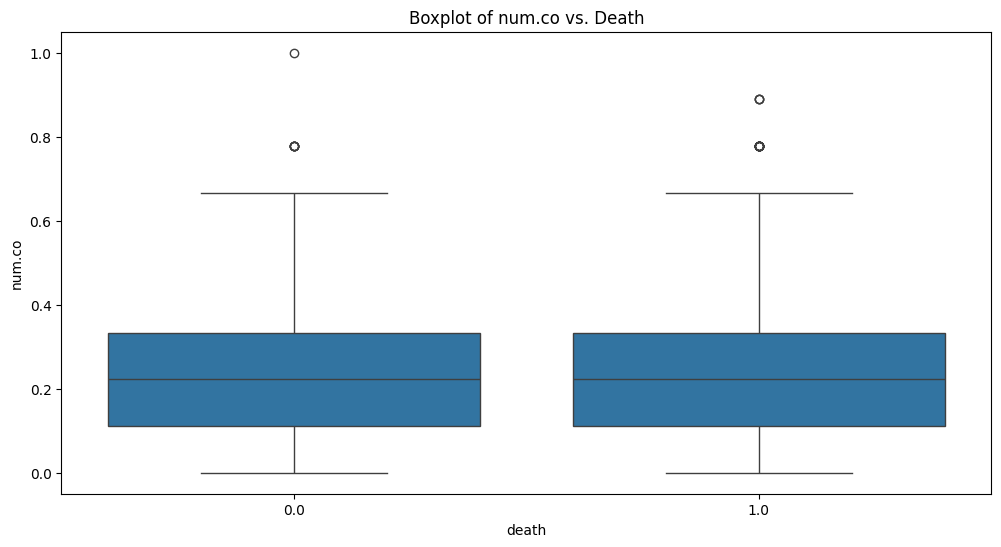

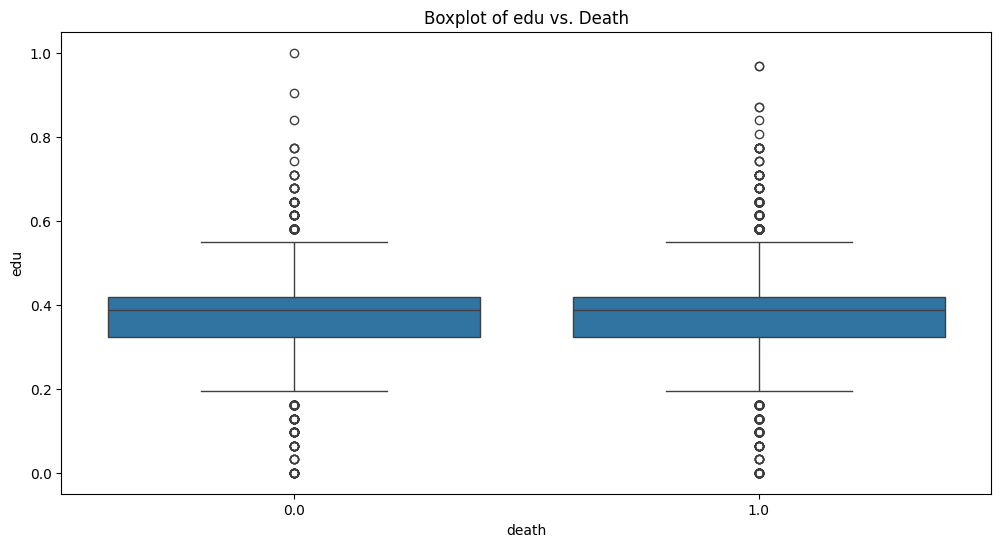

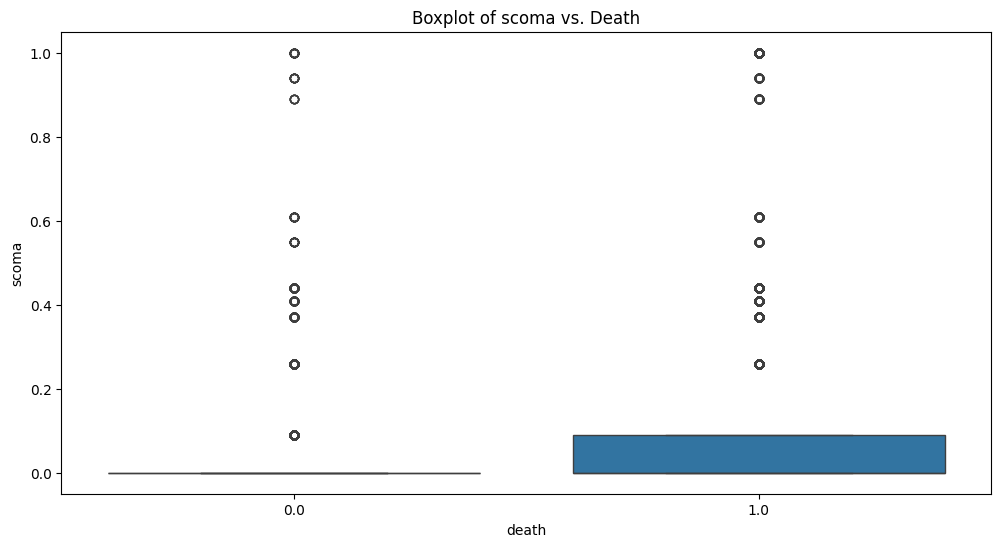

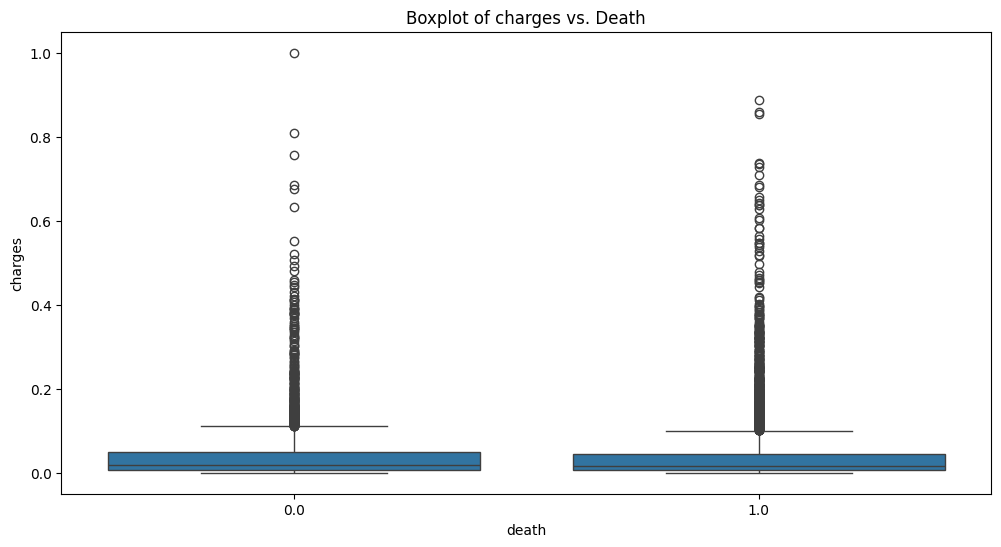

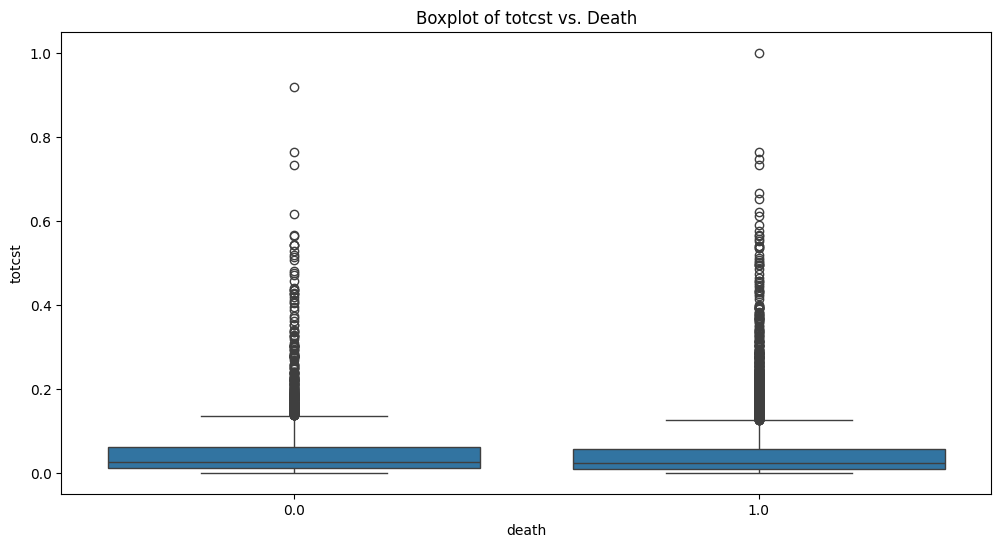

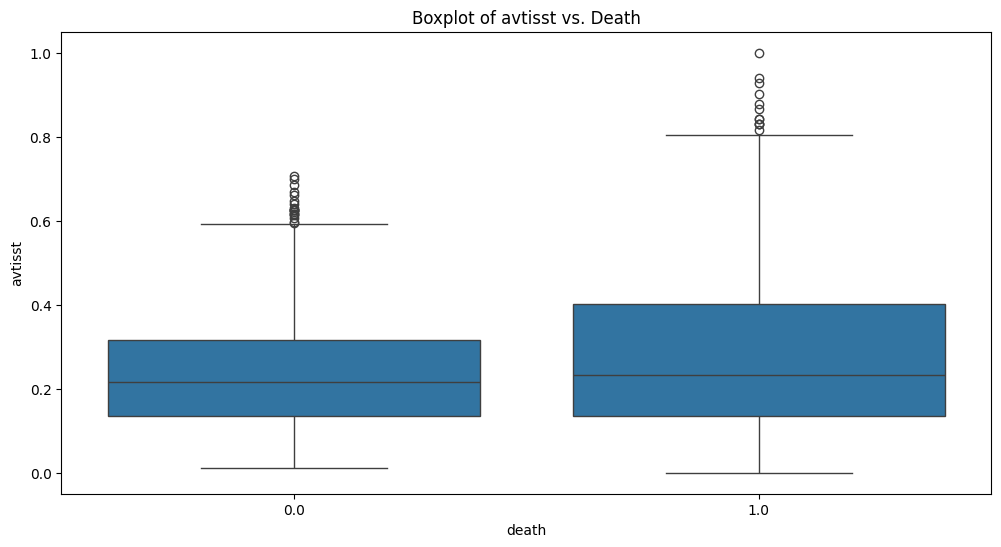

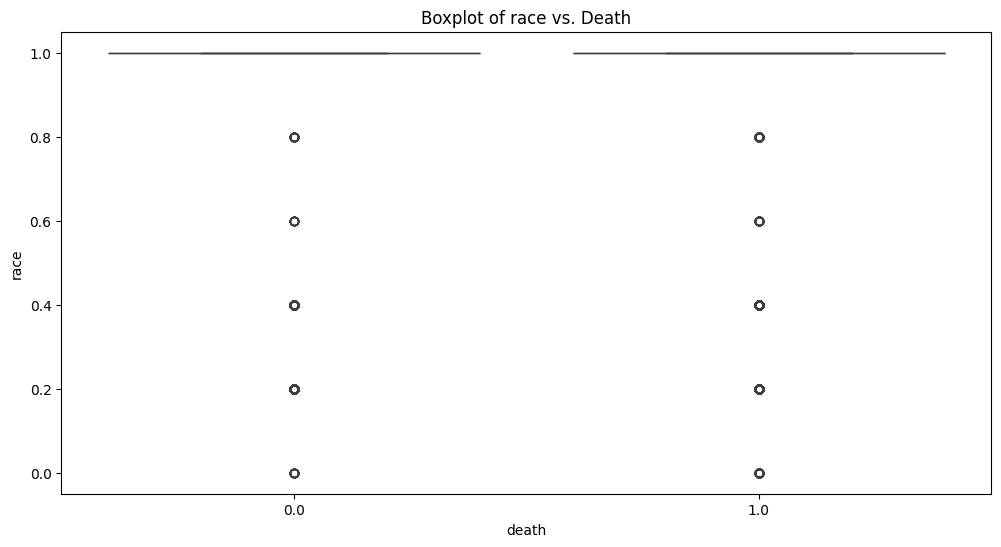

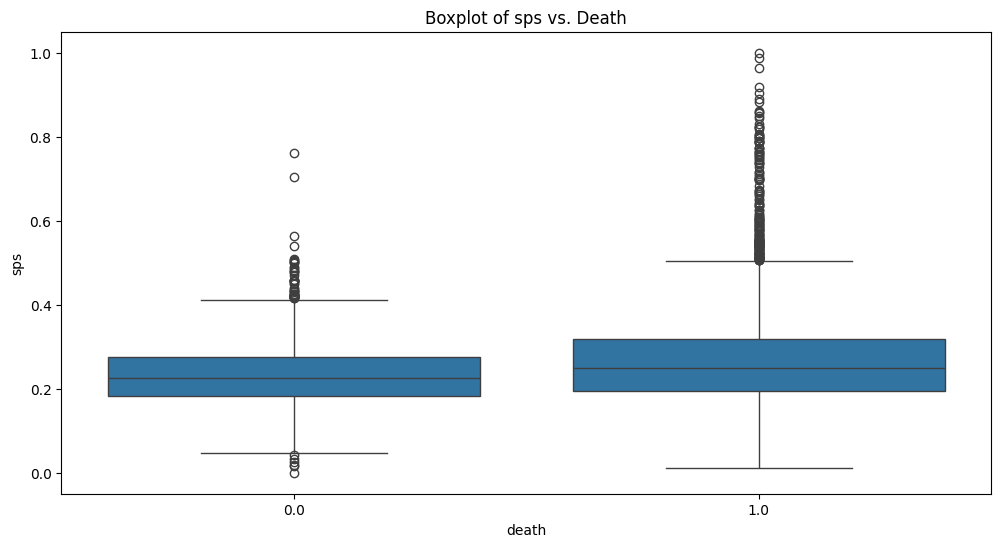

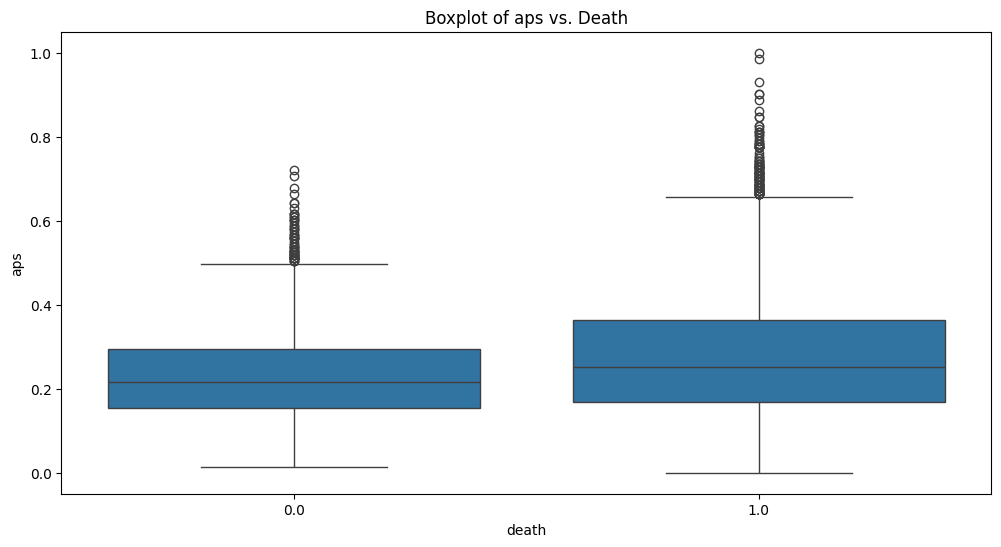

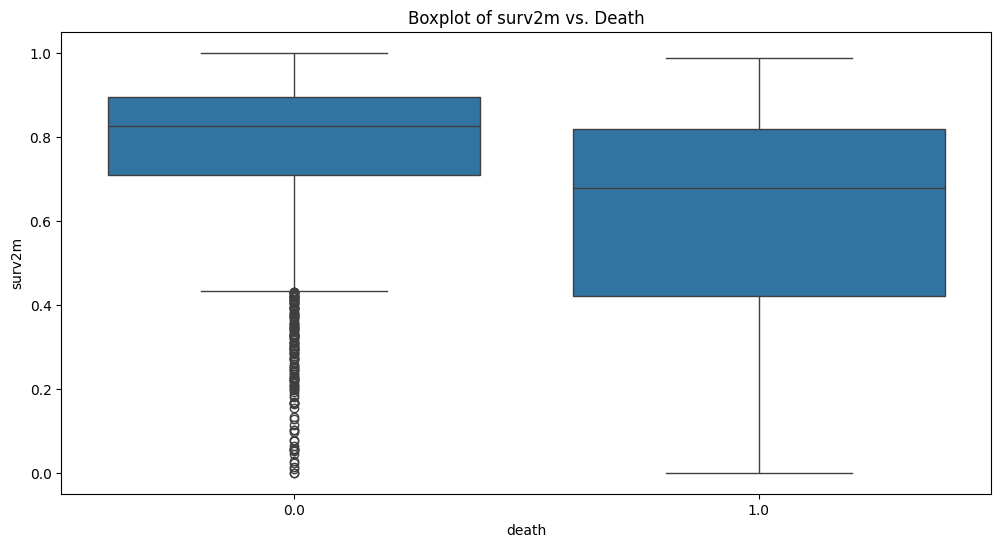

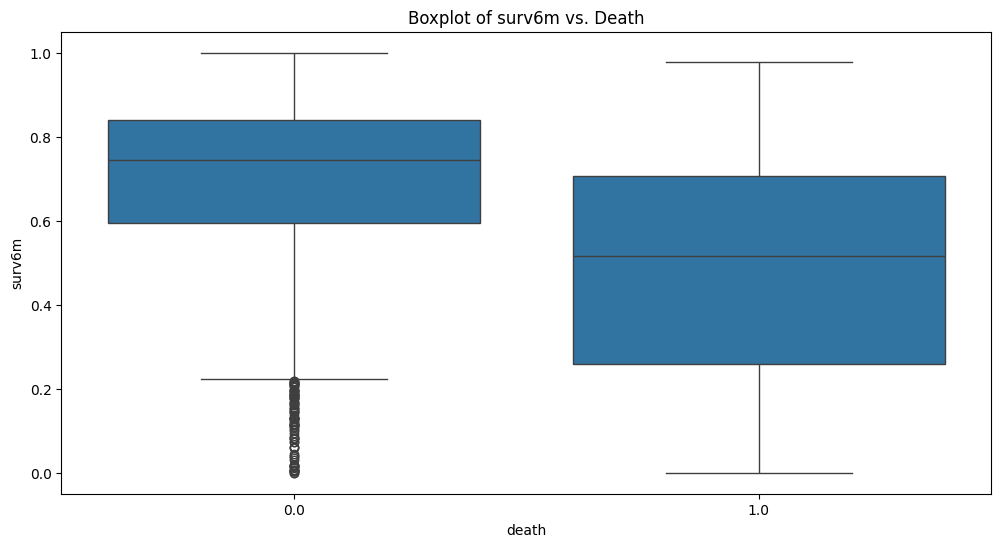

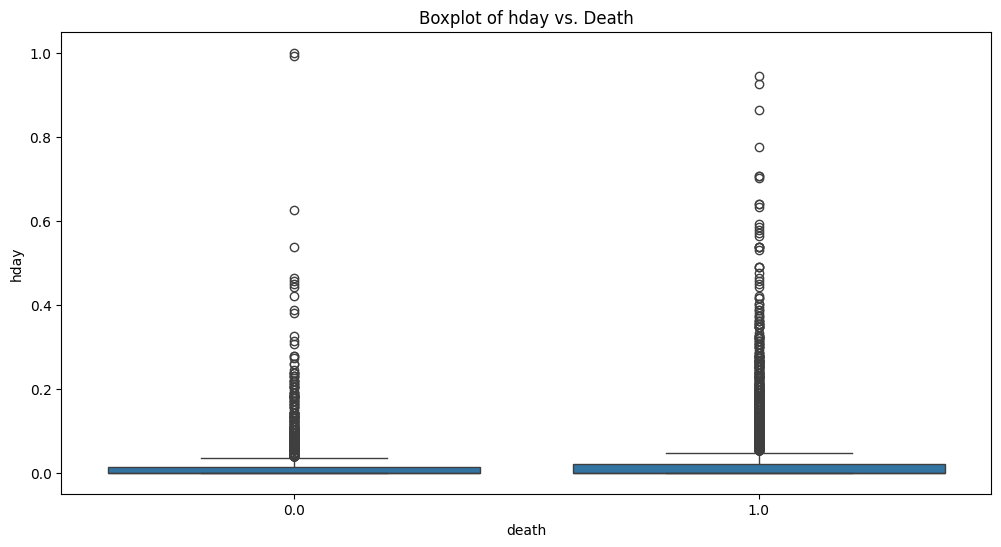

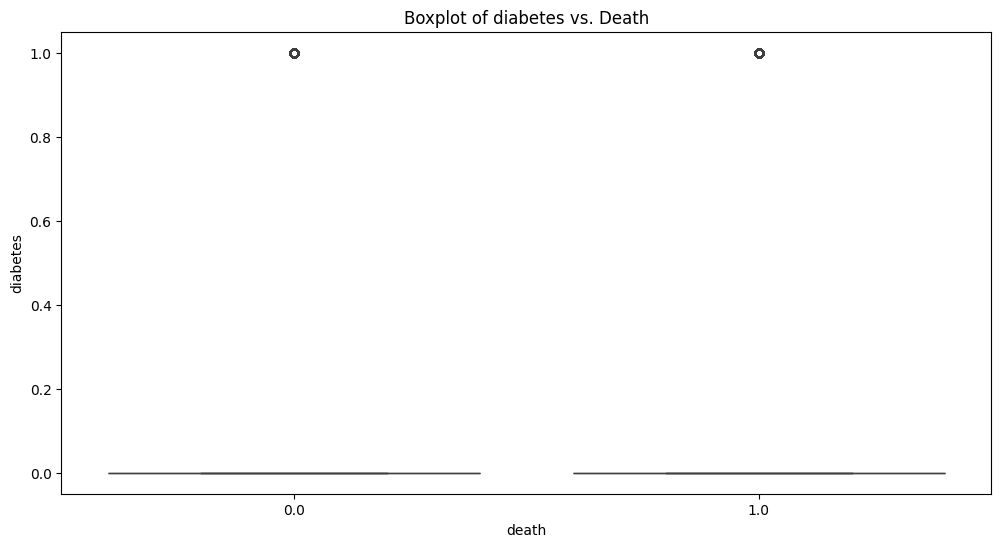

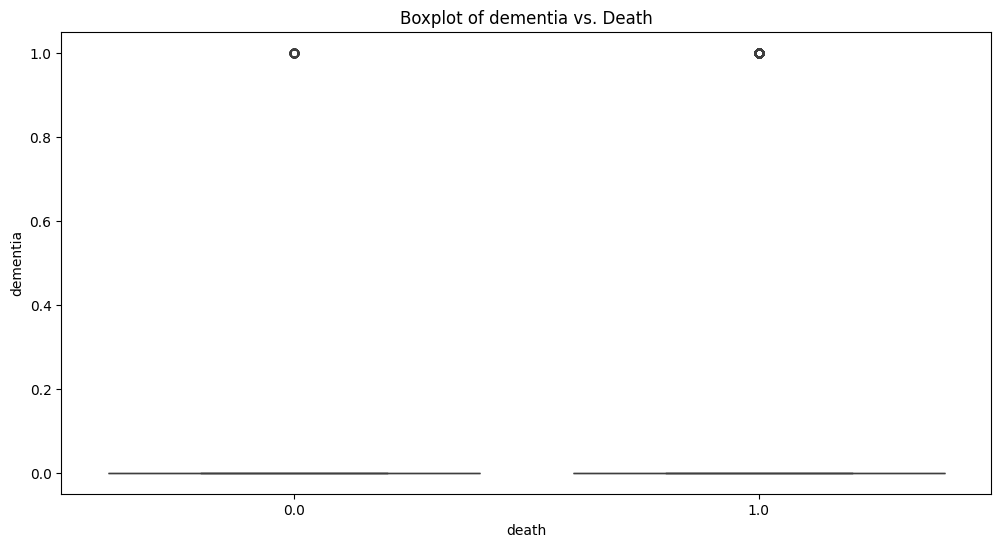

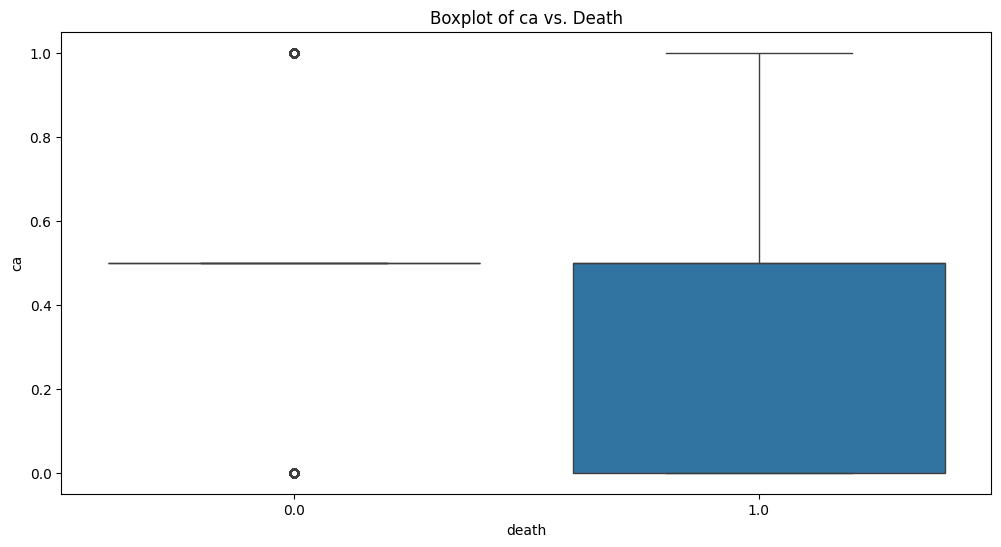

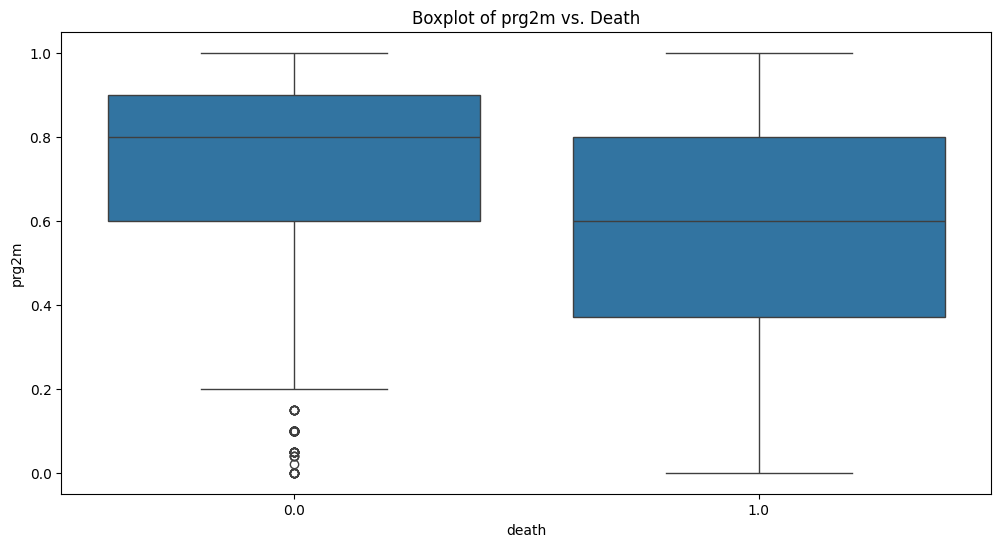

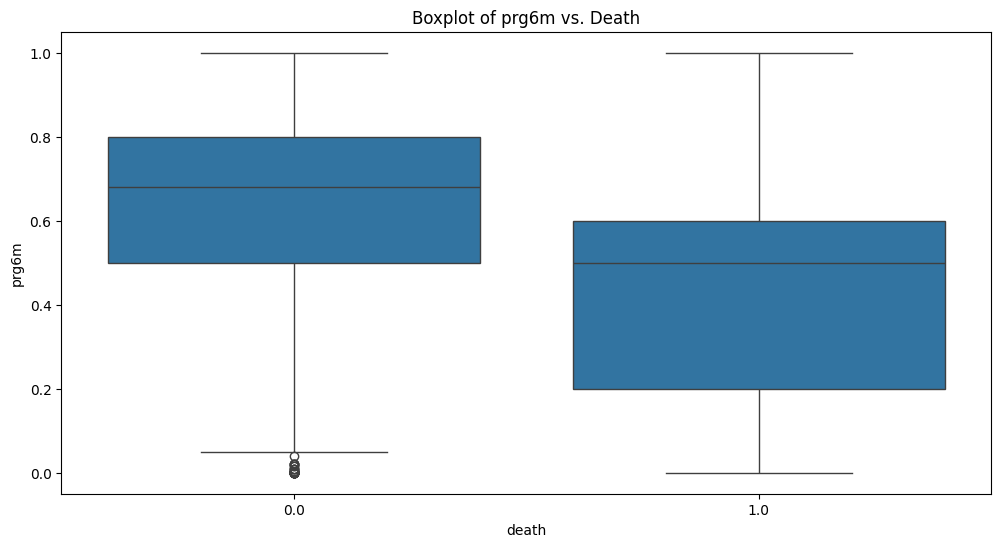

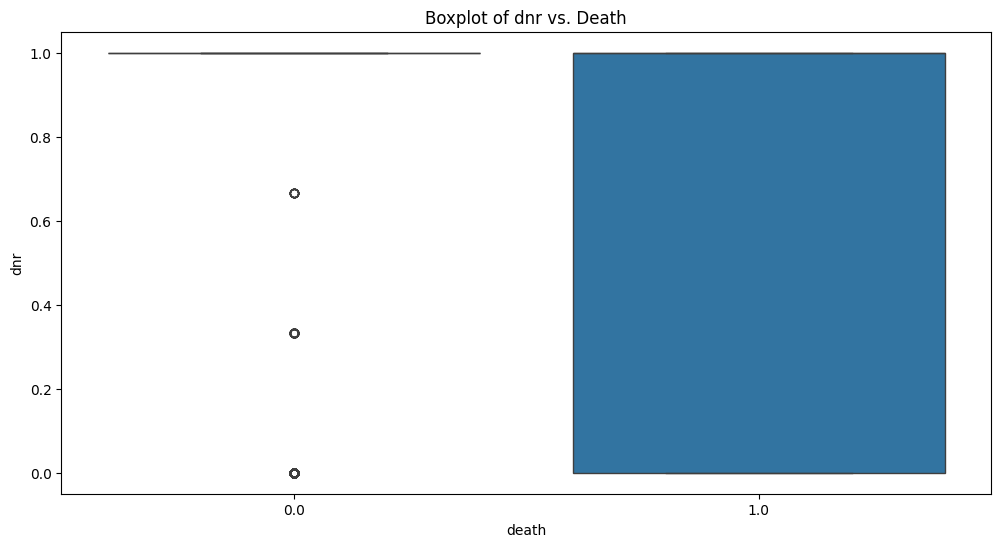

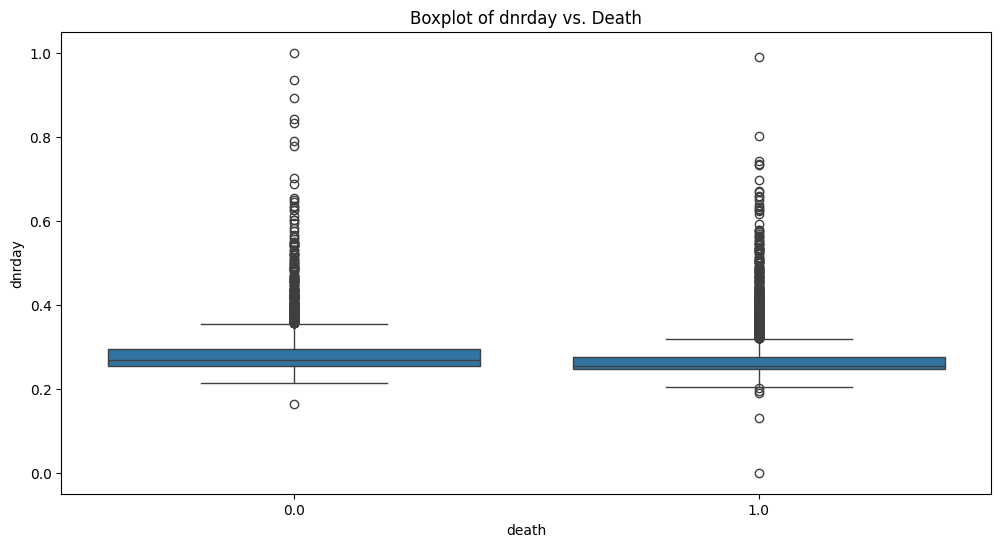

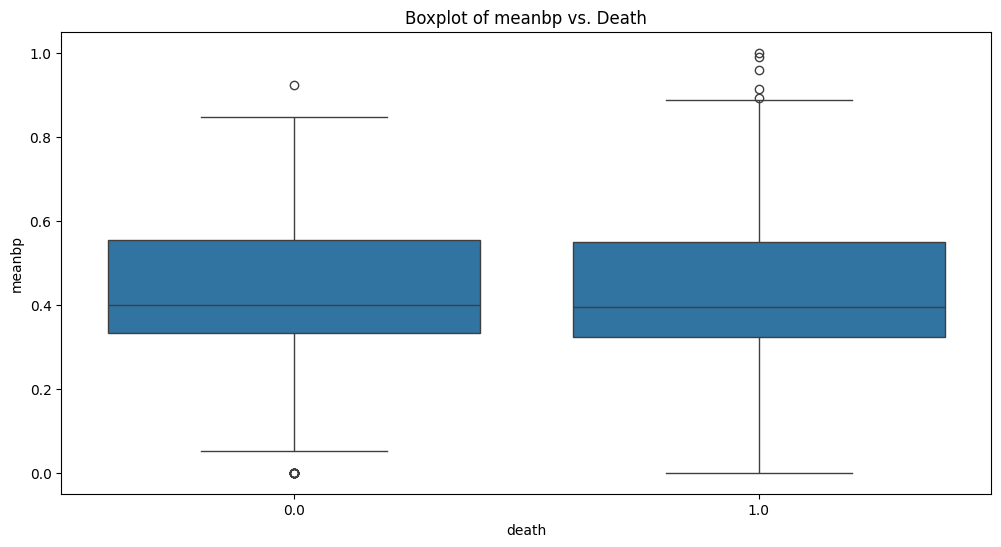

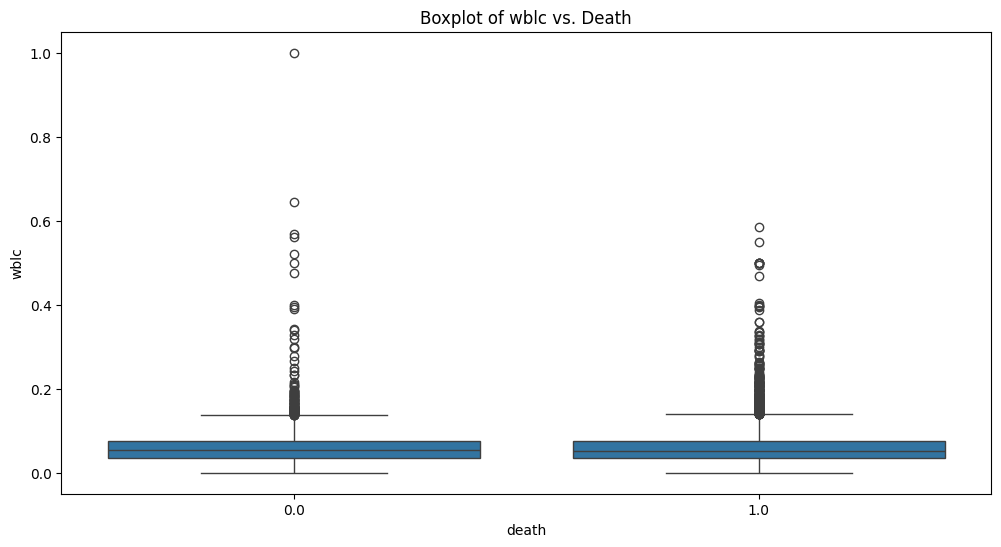

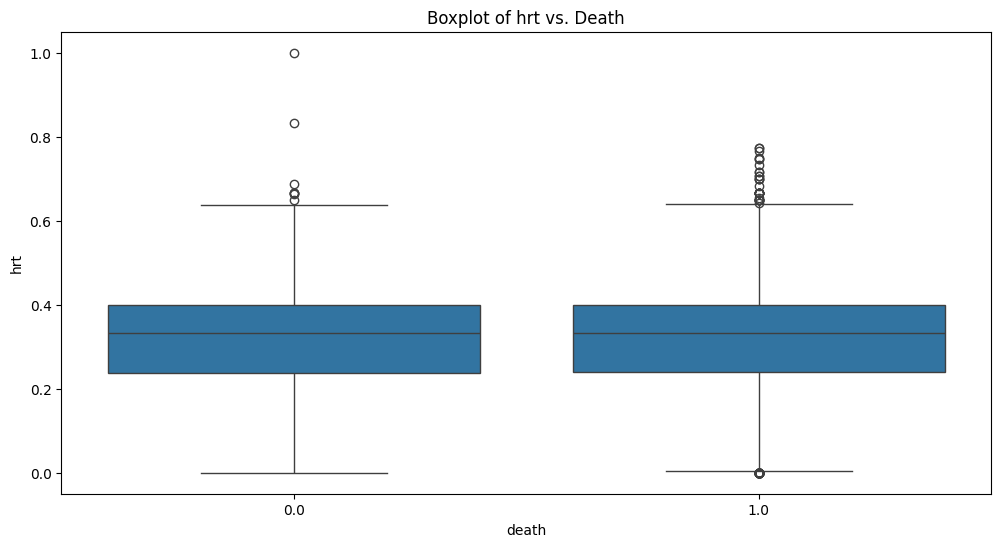

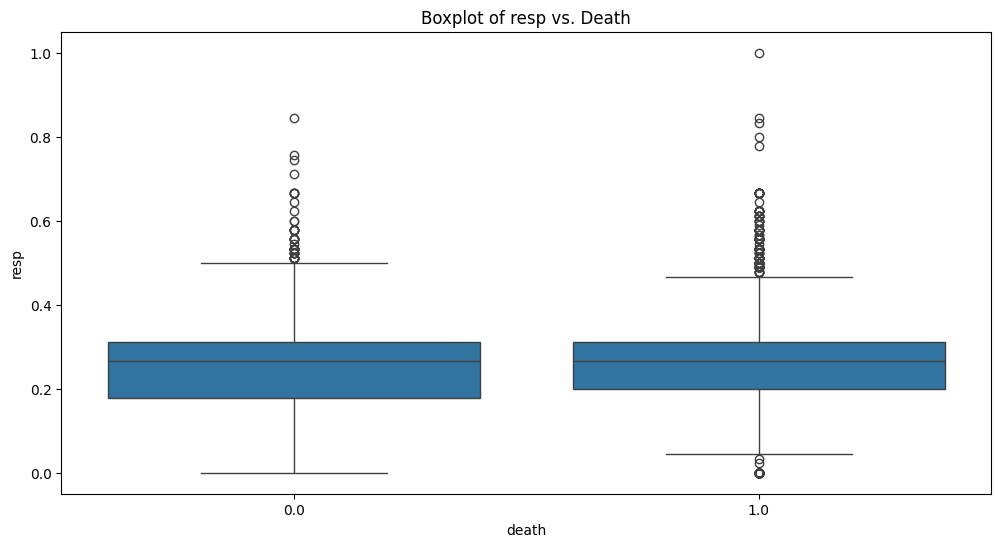

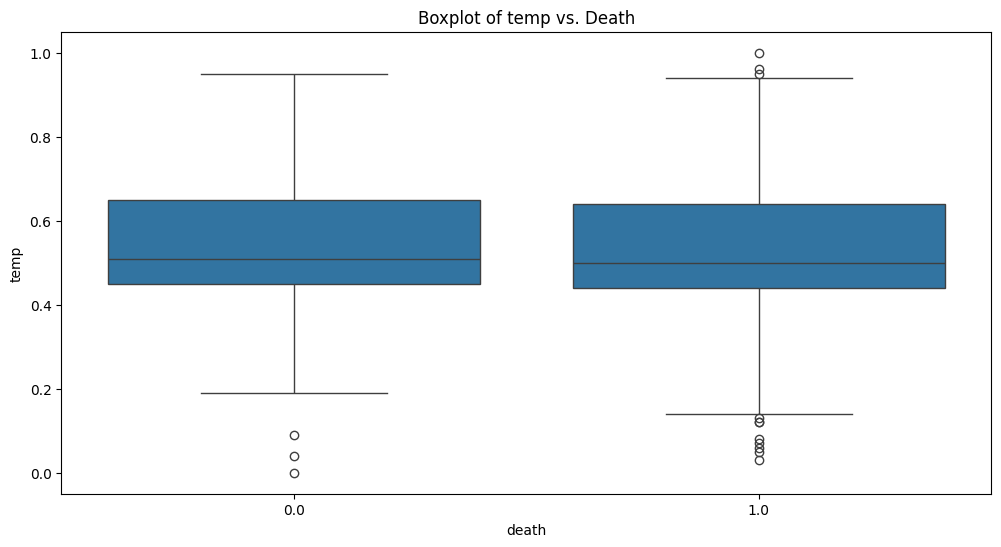

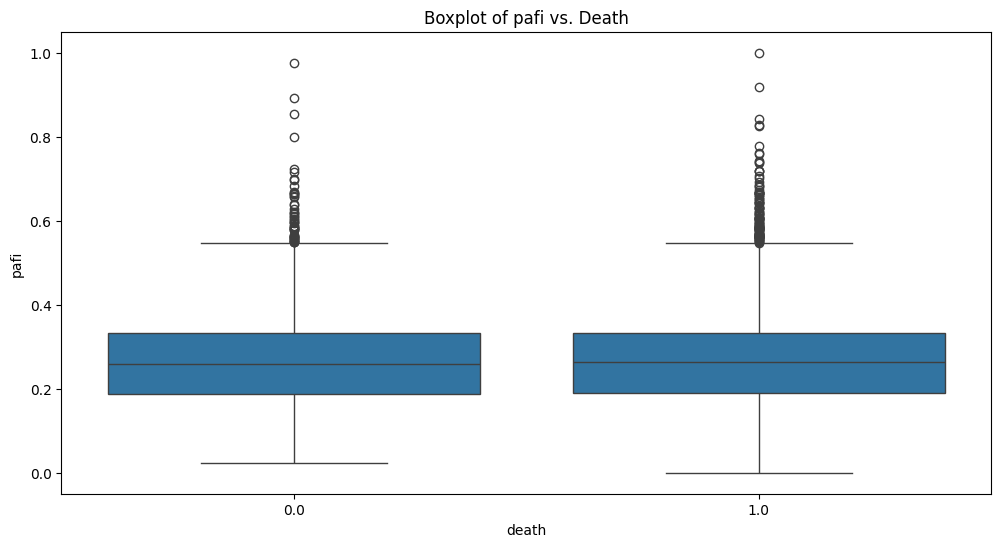

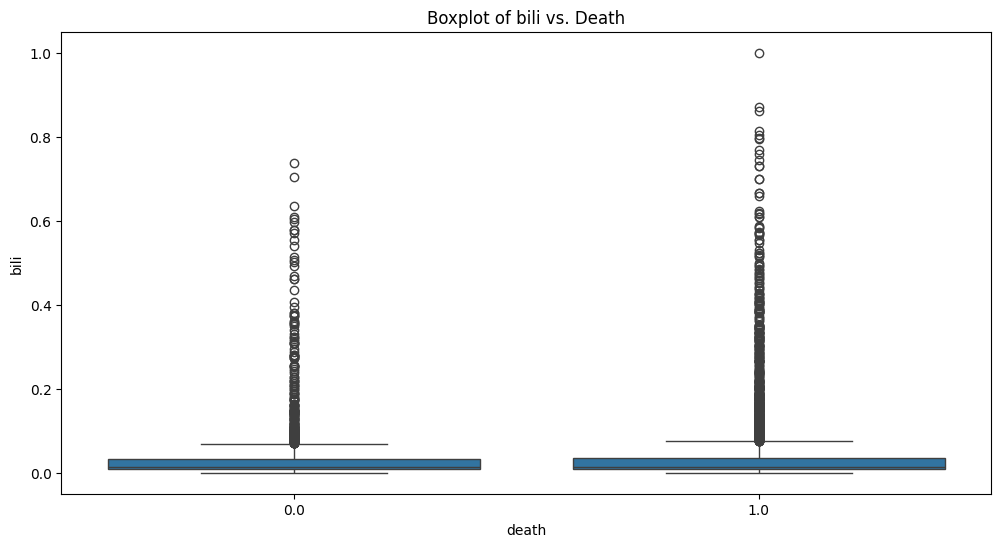

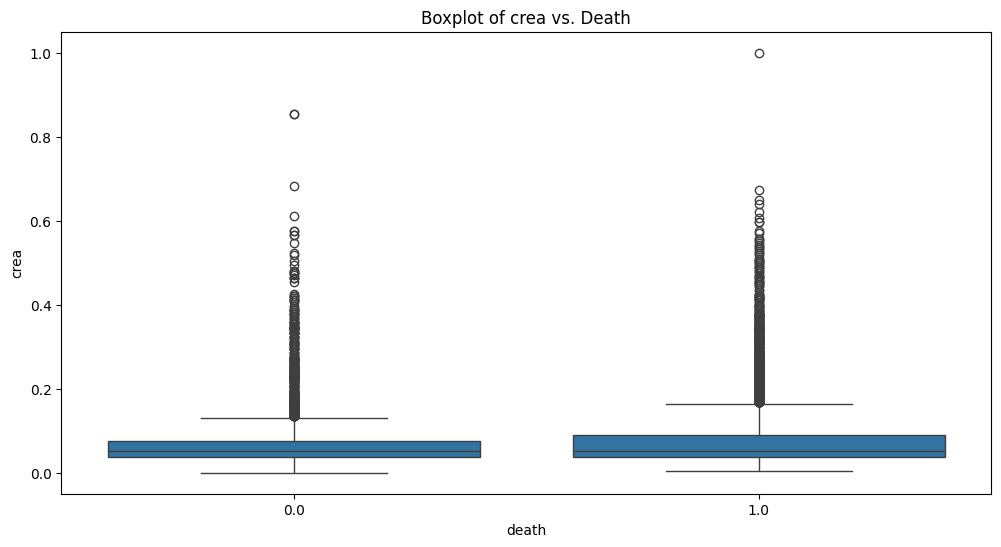

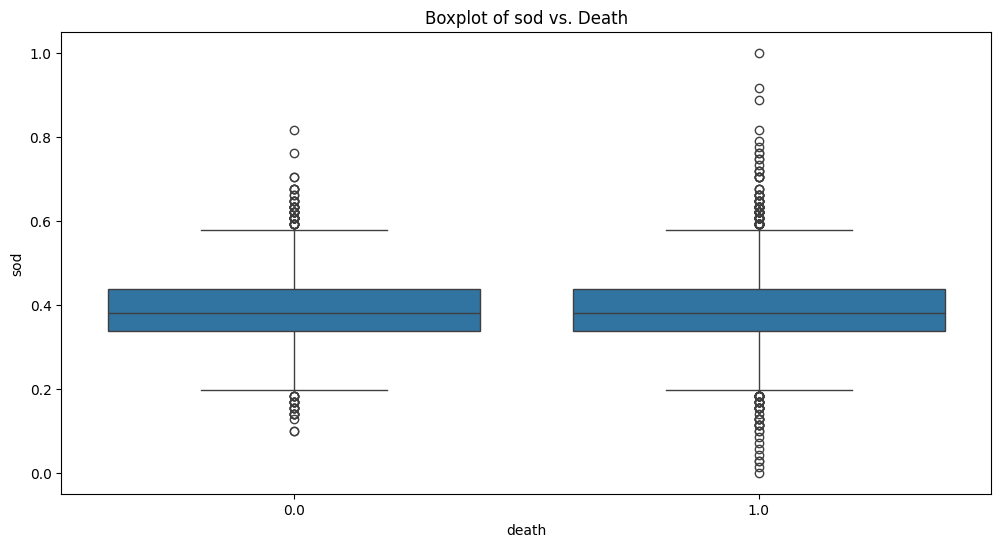

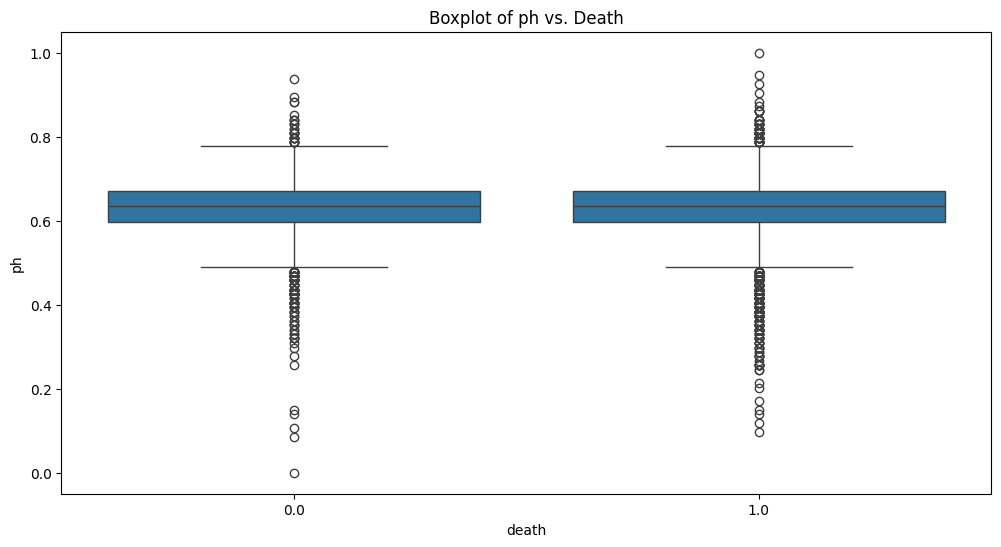

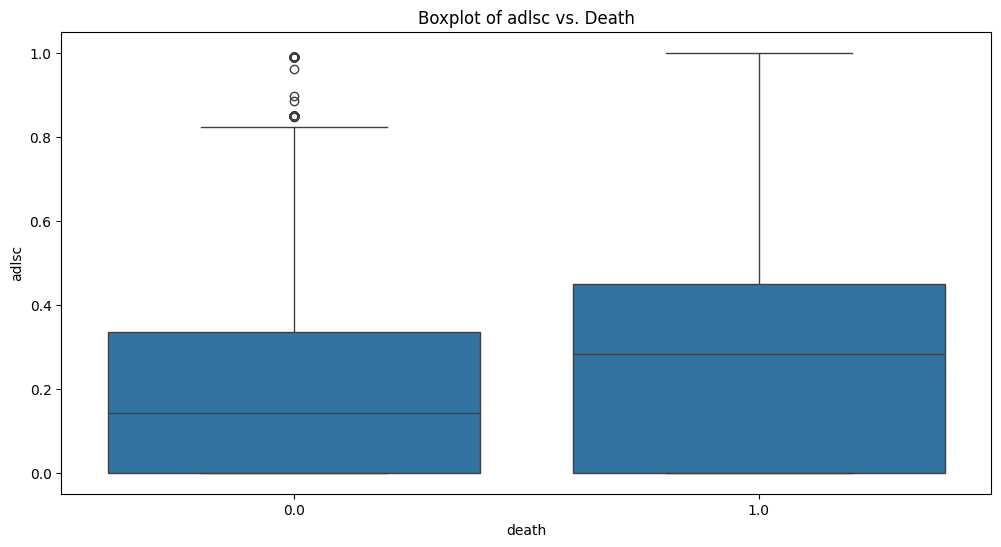

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'death' is your target variable

plt.figure(figsize=(12, 6))
sns.boxplot(x='death', y='age', data=df) # Example with 'age'
plt.title('Boxplot of Age vs. Death')
plt.show()

# Repeat for other numerical features
numerical_features = df.select_dtypes(include=['number']).columns
for feature in numerical_features:
  if feature != 'death': # exclude the target variable
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='death', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs. Death')
    plt.show()

# Balancing data

<ipython-input-104-190369dd1108>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='death', data=df_balanced, palette='Set1')


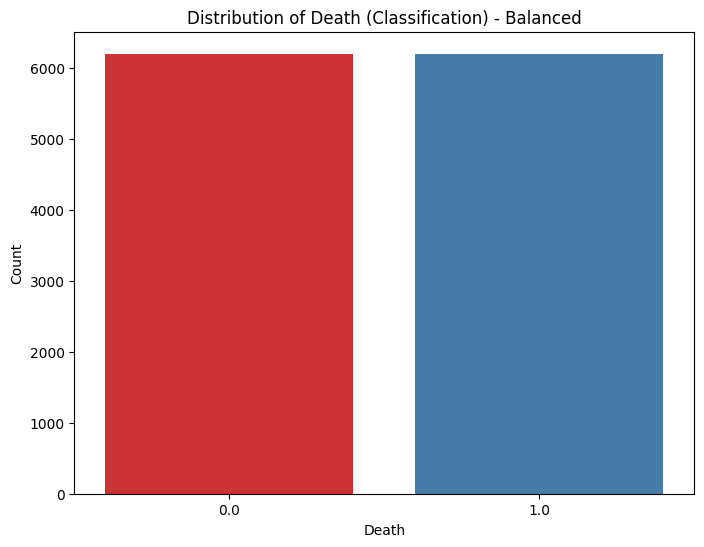

In [104]:
# balancing data

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Pisahkan fitur (X) dan target (y)
X = df.drop('death', axis=1)
y = df['death']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Lakukan oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Buat DataFrame baru dengan data yang sudah di-balancing
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['death'] = y_resampled

# Visualisasi distribusi kolom 'death' setelah balancing
plt.figure(figsize=(8, 6))
sns.countplot(x='death', data=df_balanced, palette='Set1')
plt.title('Distribution of Death (Classification) - Balanced')
plt.xlabel('Death')
plt.ylabel('Count')
plt.show()

df = df_balanced


# Visualisasi

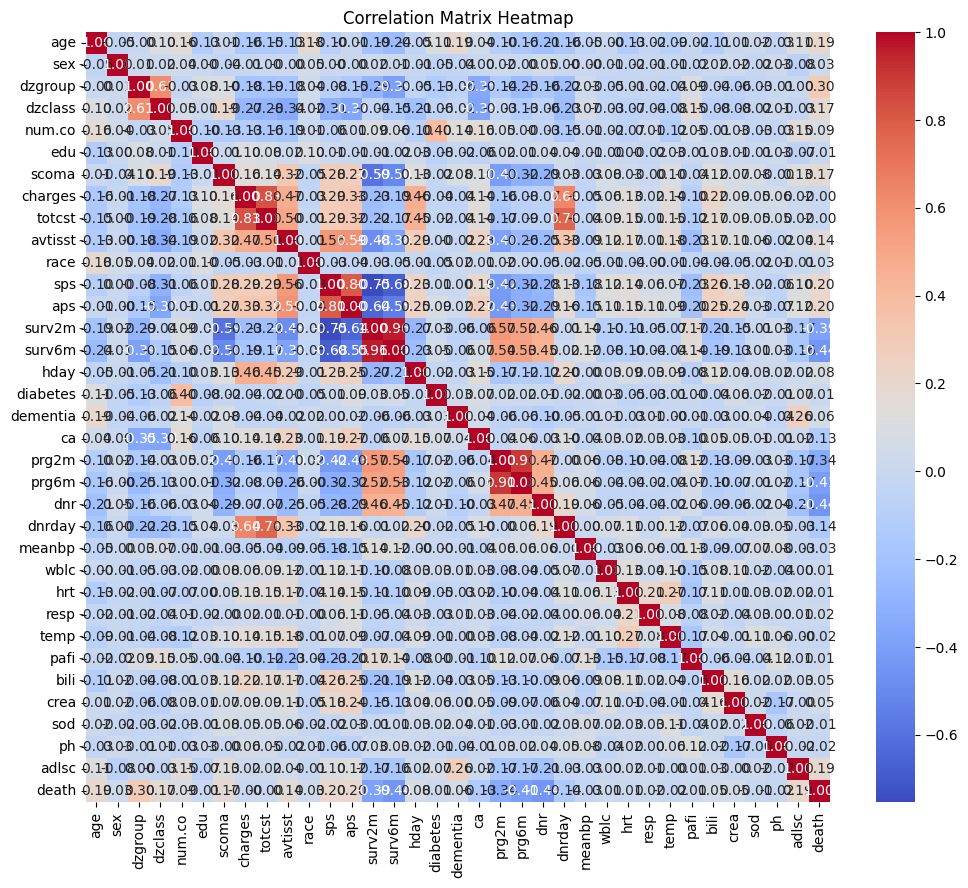

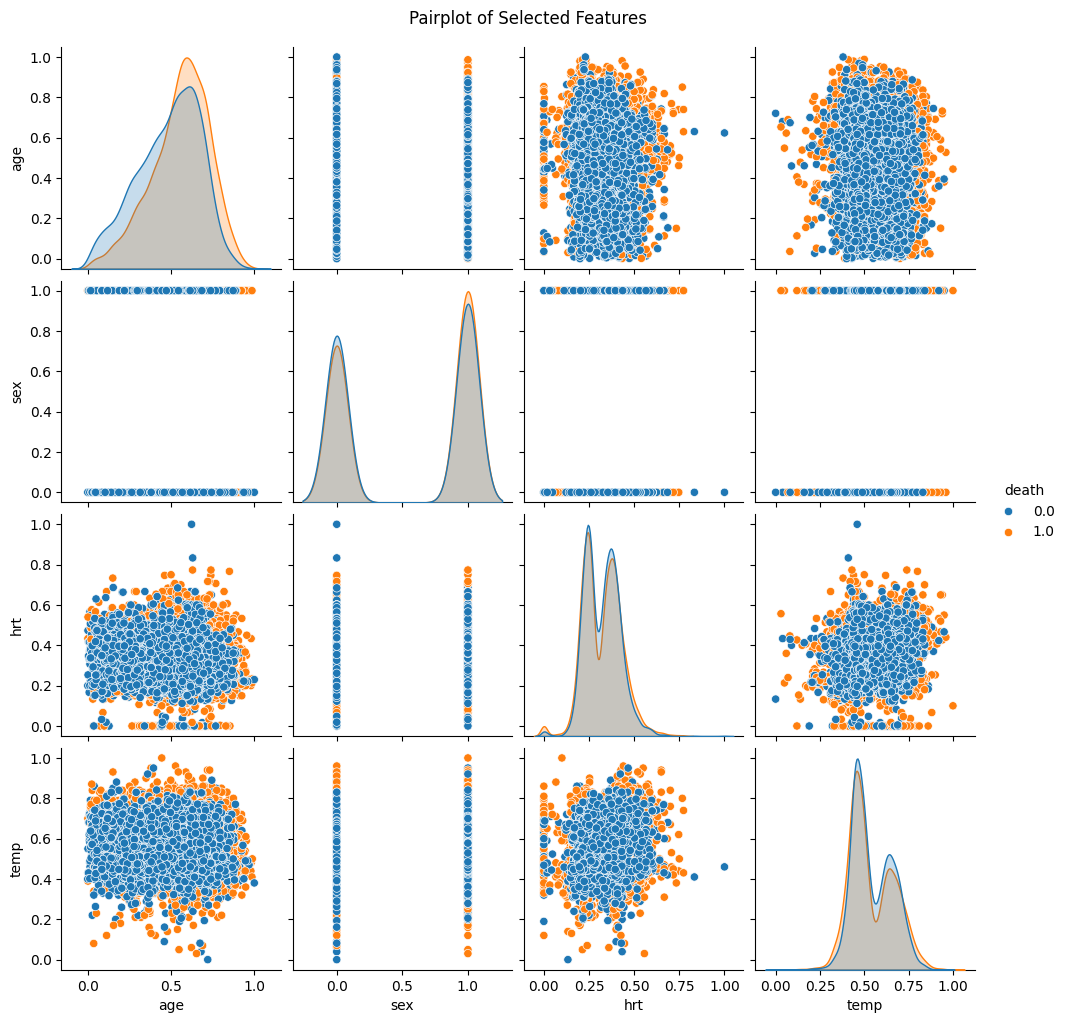

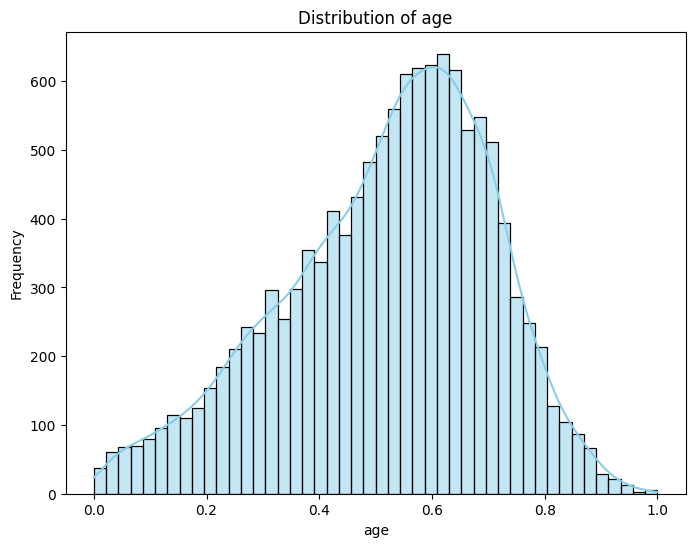

<ipython-input-105-1b3d90876e7e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='death', y=col, data=df, palette='Set2')


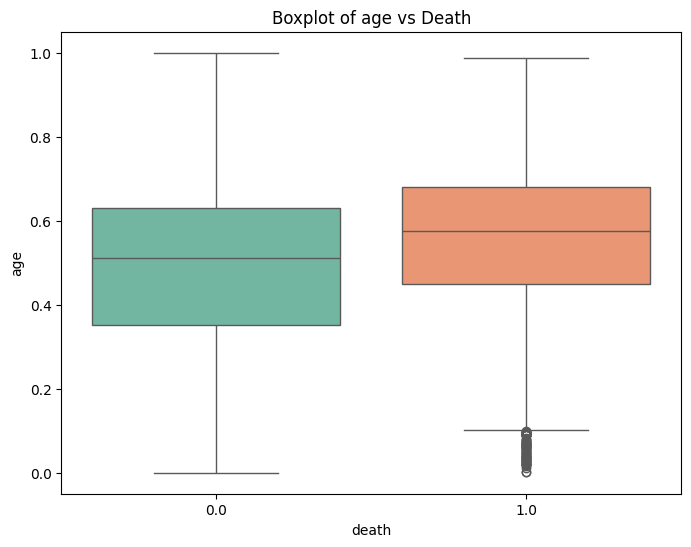

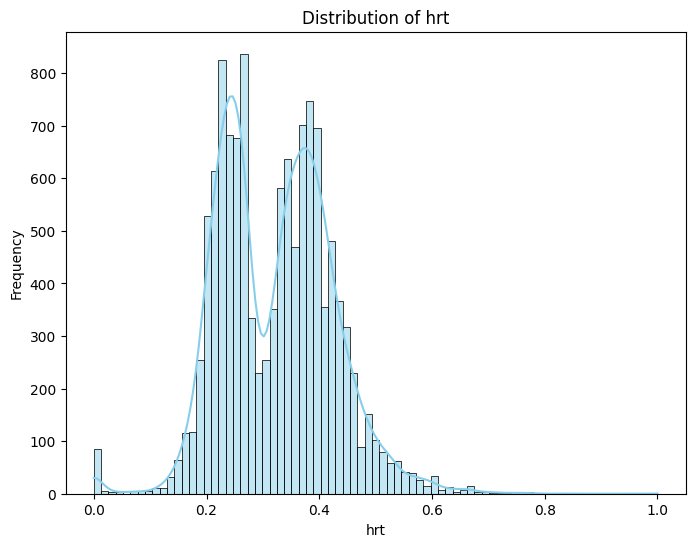

<ipython-input-105-1b3d90876e7e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='death', y=col, data=df, palette='Set2')


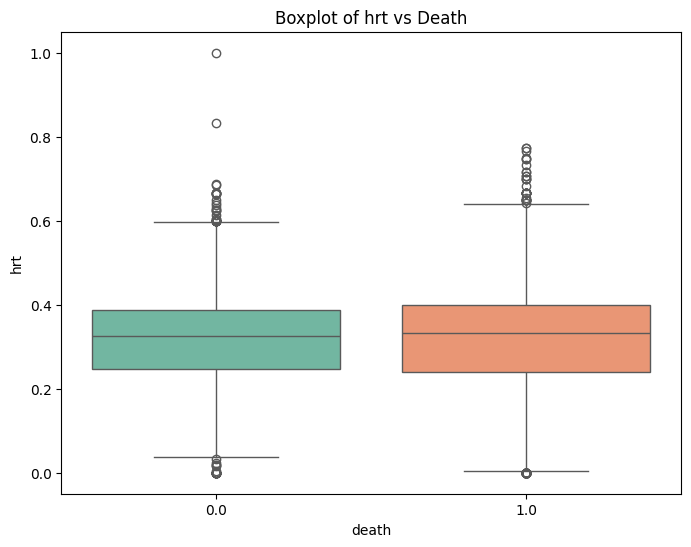

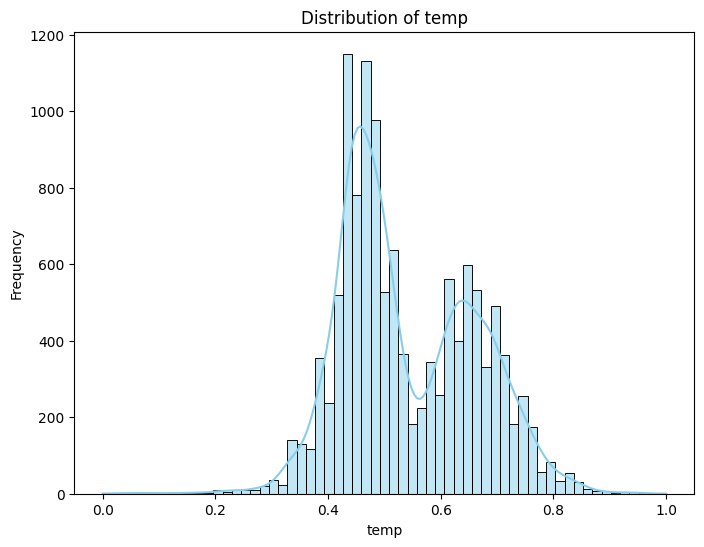

<ipython-input-105-1b3d90876e7e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='death', y=col, data=df, palette='Set2')


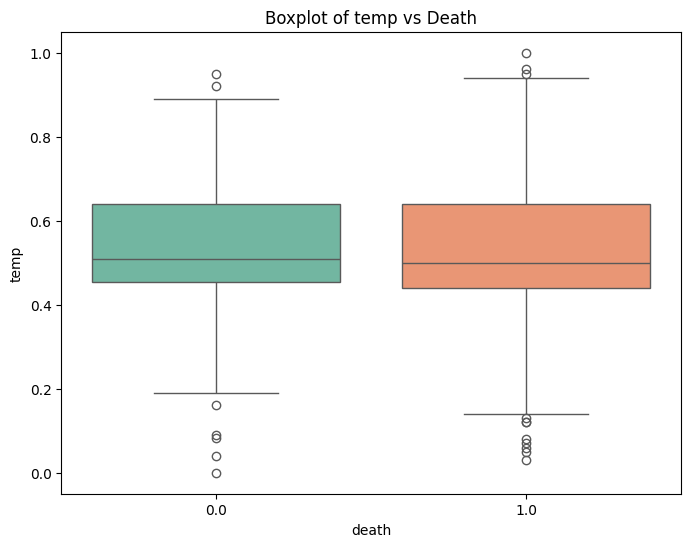

In [105]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pairplot for selected features
# Use actual column names present in the DataFrame 'df'
selected_features = ['age', 'sex', 'hrt', 'temp']  # Example features - Adjust if needed
sns.pairplot(df[selected_features + ['death']], hue='death')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Distribution plots for key features
# Use actual column names present in the DataFrame 'df'
for col in ['age', 'hrt', 'temp']:  # Example numerical features - Adjust if needed
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='death', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot of {col} vs Death')
    plt.show()

# Klasifikasi KNN

Best K value: 1
Accuracy: 0.8250705360741637
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      1241
         1.0       0.92      0.72      0.80      1240

    accuracy                           0.83      2481
   macro avg       0.84      0.83      0.82      2481
weighted avg       0.84      0.83      0.82      2481



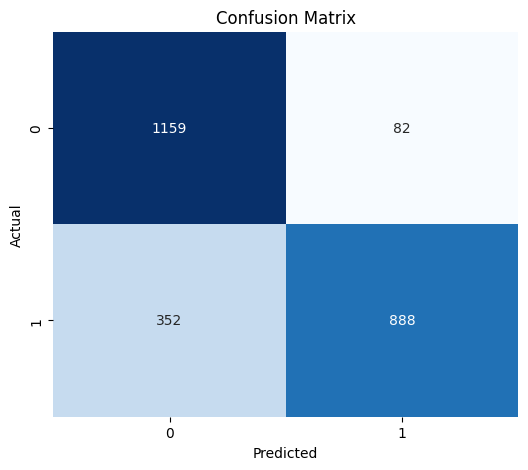

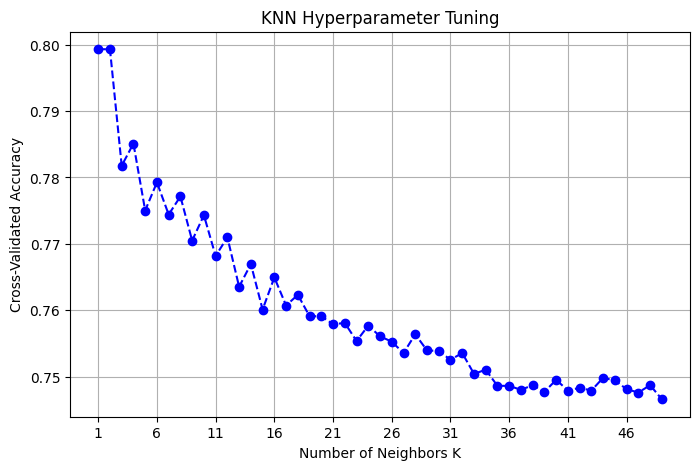

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Define features and target
X = df.drop(columns=["death"])
y = df["death"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier with hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 50)}
grid = GridSearchCV(KNeighborsClassifier(weights='distance', metric='euclidean'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best K value
best_k = grid.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

# Train final KNN model
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Best K selection
plt.figure(figsize=(8, 5))
plt.plot(param_grid['n_neighbors'], grid.cv_results_['mean_test_score'], marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.xticks(param_grid['n_neighbors'][::5])
plt.grid()
plt.show()


Best K value: 1
Accuracy: 0.8299072954453849
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85      1241
         1.0       0.92      0.72      0.81      1240

    accuracy                           0.83      2481
   macro avg       0.85      0.83      0.83      2481
weighted avg       0.85      0.83      0.83      2481



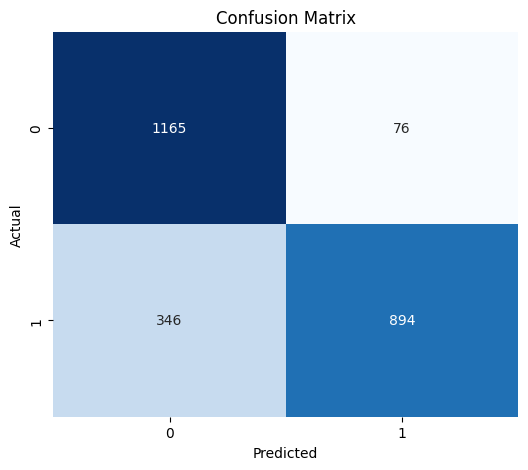

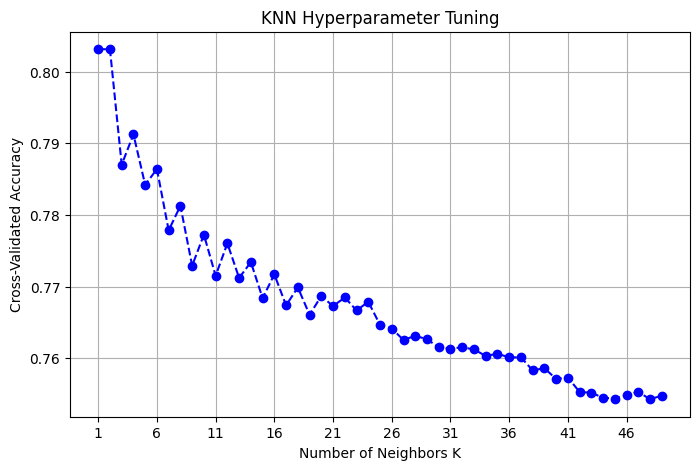

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Define features and target
X = df.drop(columns=["death"])
y = df["death"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier with hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 50)}
grid = GridSearchCV(KNeighborsClassifier(weights='distance', metric='manhattan'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best K value
best_k = grid.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

# Train final KNN model
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Best K selection
plt.figure(figsize=(8, 5))
plt.plot(param_grid['n_neighbors'], grid.cv_results_['mean_test_score'], marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.xticks(param_grid['n_neighbors'][::5])
plt.grid()
plt.show()



Best K value: 1
Accuracy: 0.7863764611043934
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.92      0.81      1241
         1.0       0.89      0.65      0.75      1240

    accuracy                           0.79      2481
   macro avg       0.81      0.79      0.78      2481
weighted avg       0.81      0.79      0.78      2481



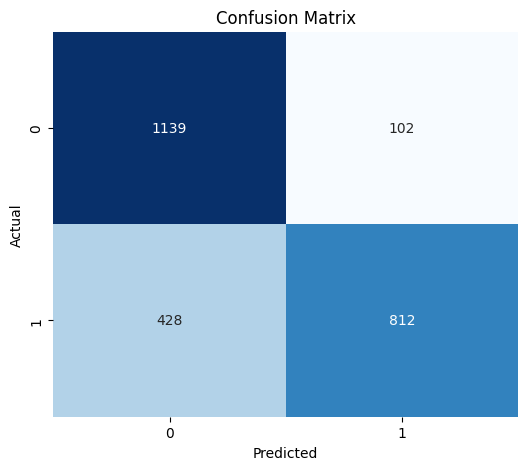

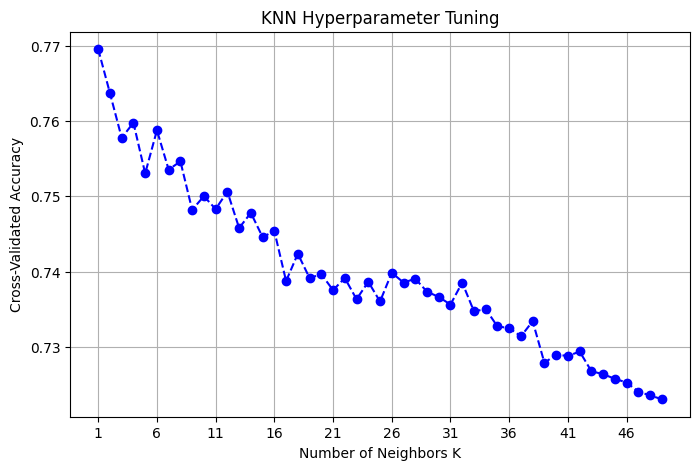

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Define features and target
X = df.drop(columns=["death"])
y = df["death"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier with hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 50)}
grid = GridSearchCV(KNeighborsClassifier(weights='distance', metric='chebyshev'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best K value
best_k = grid.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

# Train final KNN model
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='chebyshev')
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Best K selection
plt.figure(figsize=(8, 5))
plt.plot(param_grid['n_neighbors'], grid.cv_results_['mean_test_score'], marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.xticks(param_grid['n_neighbors'][::5])
plt.grid()
plt.show()

